# Data Glacier Internship Final Project

# Connect to Google Drive

Mount GDrive

In [1]:
from google.colab import drive
drive.mount('/content/GDrive')

Mounted at /content/GDrive


Move to the Target Directory by using the Copied Path

In [8]:
%cd /content/

/content


List the Files present into the Current Directory

In [9]:
!ls

 AE_Pipeline.png	      'NTM Speciality Type and Specialist Flag.png'
'Comorbidity of Disases.png'   __pycache__
'Concomitancy of Drugs.png'   'Risk Factors.png'
 Dataset_DA.xlsx	       sample_data
 Dataset.xlsx		       Skewness.png
 Demographics.png	      'Standard Error.png'
 GDrive			       Unet_1DCNN.py
 Kurtosis.png		       Unet_Model.png
 ml_models.py


# Import Necessary Documents and Libraries

In [4]:
%cd /content/
!gdown --id 1jhKhP0yE2ldQDpxwNNWLDZDmq1PKJluP
!gdown --id 1jhtHScKs9s24MIUIdzstX9o_bJwMyqSO
!gdown --id 1X-UAbmJtGto7fYIe3VPELsOxDCQZI-ns
!gdown --id 1CWuvegZri_p0ECPktTN7a3IFTW69Pudc
!gdown --id 1n0GQ6sZPfvynYaJPrPaXpojbZvXVVRhz
!gdown --id 1bD-wz_AwTzHEw6nrWe5VhDr3oZE-H8G5
!gdown --id 1G7v6ZZzYfQ2LFh29Lc7RPe9ThM0nwGWZ
!gdown --id 1nFDnQJtbu5Pe5SENYbZPjjb4j6Q-hslm
!gdown --id 1TtGRU5j3rmPOuUGnrIuUPAuGr6RZhrv9
!gdown --id 18RX-P151XnWiFgOor6EGU3RB-Usu9Ul2
!gdown --id 1UNHUeqM4vjpHSGE816EzJy9wpLzXhQDD
!gdown --id 1-J7JJpw0qdti8UFRQKiWUPl3AVQp9JO0
!gdown --id 1-sxPHXy2mxMXifUbDSiqZFUDMj9uLgKS
!gdown --id 1m3hzV5AUH9PNfrCghRagSf0cSVICbfKw

/content
Downloading...
From: https://drive.google.com/uc?id=1jhKhP0yE2ldQDpxwNNWLDZDmq1PKJluP
To: /content/Demographics.png
100% 90.3k/90.3k [00:00<00:00, 32.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jhtHScKs9s24MIUIdzstX9o_bJwMyqSO
To: /content/NTM Speciality Type and Specialist Flag.png
100% 66.4k/66.4k [00:00<00:00, 24.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1X-UAbmJtGto7fYIe3VPELsOxDCQZI-ns
To: /content/Standard Error.png
100% 66.5k/66.5k [00:00<00:00, 24.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CWuvegZri_p0ECPktTN7a3IFTW69Pudc
To: /content/Skewness.png
100% 69.0k/69.0k [00:00<00:00, 24.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1n0GQ6sZPfvynYaJPrPaXpojbZvXVVRhz
To: /content/Risk Factors.png
100% 70.8k/70.8k [00:00<00:00, 25.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bD-wz_AwTzHEw6nrWe5VhDr3oZE-H8G5
To: /content/Concomitancy of Drugs.png
100% 51.6k/51.6k [00:00<00:00, 72.0MB/s]
Downloading...


In [5]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import PIL
import h5py
import scipy
import PIL.Image
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, classification_report
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import plot_model

In [6]:
%matplotlib inline
sns.set_style('white')

In [7]:
%cd /content/
from ml_models import *

/content


# Data Analysis

## Import Dataset and Display Contents Partially

In [10]:
%cd /content/
df = pd.read_excel('Dataset.xlsx')

/content


In [11]:
df.drop(columns= ['Ptid'],inplace= True)

In [12]:
df.head()

,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Persistency_Flag
0,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,0,0,0,0,0,1,0,0,3,2,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,0,0,0,0,0,1,2,2,2,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,0,0,0,0,1,0,1,0,3,3,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0
3,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,1,0,0,0,0,1,1,1,0,3,3,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,1,0,0,0,0,1,0,2,2,2,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


## Describe the Dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Gender                                                              3424 non-null   object
 1   Race                                                                3424 non-null   object
 2   Ethnicity                                                           3424 non-null   object
 3   Region                                                              3424 non-null   object
 4   Age_Bucket                                                          3424 non-null   object
 5   Ntm_Speciality                                                      3424 non-null   object
 6   Ntm_Specialist_Flag                                                 3424 non-null   object
 7   Ntm_Speciality_Bucket   

In [14]:
df.describe()

,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Persistency_Flag
count,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000
mean,0.235105,0.263435,3.016063,0.273364,0.161215,0.121787,0.436040,0.569801,1.156250,1.140187,2.356308,2.230140,0.949474,0.746787,0.892523,0.447722,0.441881,0.394860,0.319217,0.291764,0.231016,0.238610,0.227512,0.197722,0.151285,0.515479,0.267815,0.189544,0.183995,0.345210,0.360105,0.284171,0.280082,0.186040,0.176110,0.166764,0.128213,0.145152,0.103096,0.040596,0.000876,0.037967,0.000584,0.037091,0.003505,0.074766,0.188084,0.137266,0.005257,0.104556,0.012266,0.477804,0.056075,0.019568,0.015771,0.003213,0.004089,0.020152,1.239486,0.376460
std,0.424126,0.440560,8.136545,0.445751,0.367783,0.327088,0.495965,0.495176,0.833039,0.845450,0.766541,0.634174,0.219059,0.434915,0.309764,0.497332,0.496683,0.488892,0.466241,0.454641,0.421544,0.426296,0.419287,0.398339,0.358379,0.499833,0.442886,0.391998,0.387537,0.475506,0.480101,0.451084,0.449105,0.389196,0.380969,0.372819,0.334375,0.352305,0.304128,0.197381,0.029591,0.191145,0.024165,0.189013,0.059105,0.263052,0.390836,0.344179,0.072325,0.306025,0.110088,0.499580,0.230100,0.138530,0.124607,0.056597,0.063822,0.140540,1.094914,0.484568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

These plots represent the Demographic Proportions of the Dataset in terms of Gender, Race, Ethnicity, Age-Bucket, Region and IDN-Indicator. Data Imabalance can be noticed in terms of Gender and Ethnicity.

/content


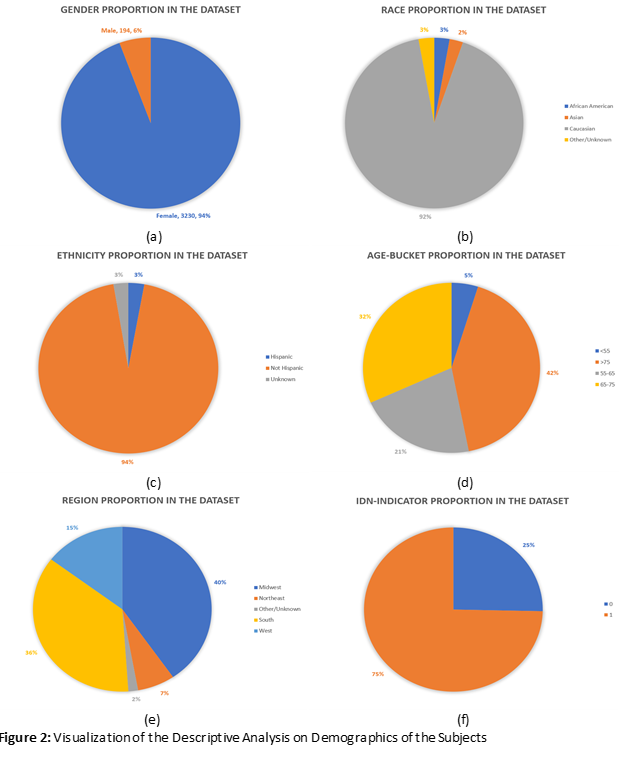

In [15]:
%cd /content/
PIL.Image.open('Demographics.png')

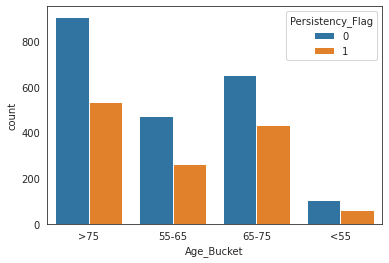

In [16]:
# checking the Age range of the patients per Persistency status 
sns.countplot(x="Age_Bucket", hue="Persistency_Flag", data=df)

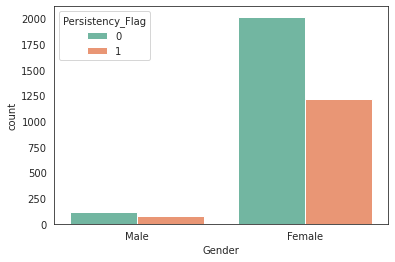

In [17]:
# checking the gender of the patients per Persistency status 
sns.countplot(x="Gender", hue="Persistency_Flag", data=df, palette="Set2")

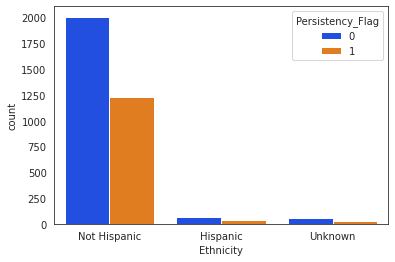

In [18]:
# checking the Ethnicity of the patients per Persistency status 
sns.countplot(x="Ethnicity", hue="Persistency_Flag", data=df, palette="bright")

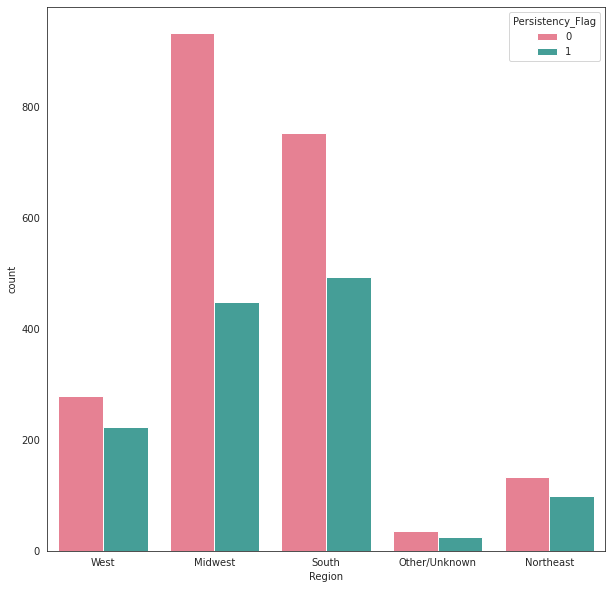

In [19]:
# checking the Region of the patients per Persistency status 
figure(figsize=(10, 10))
sns.countplot(x="Region", hue="Persistency_Flag", data=df, palette="husl")

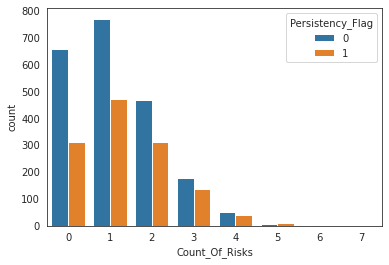

In [20]:
# checking the Region of the patients per Persistency status
sns.countplot(x="Count_Of_Risks", hue="Persistency_Flag", data=df)

The following colum chart helps us visualize the NTM Speciality Type and Specialist Flag of the responsible medical staff. It can be seen that for some diseases, the doctor was always a specialist. On the other hand, most cases were dealt by General Practitioners.

/content


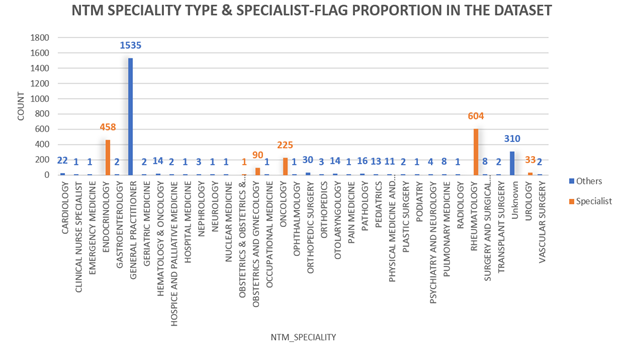

In [21]:
%cd /content/
PIL.Image.open('NTM Speciality Type and Specialist Flag.png')

This stacked percentage column chart represents the Concomitancy of various drugs. The rates vary for different drugs from as low as 10% to as high as 35%.

/content


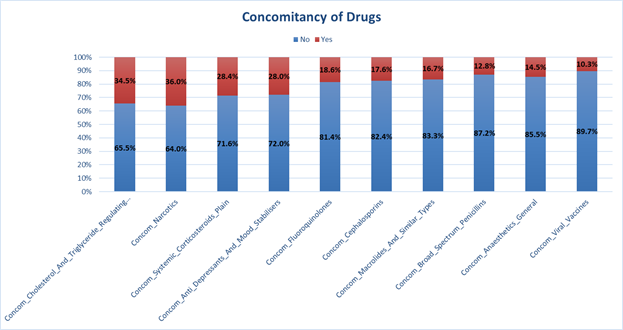

In [22]:
%cd /content/
PIL.Image.open('Concomitancy of Drugs.png')

Comorbidity of diseases have been represented by the following column chart. For some cases, the rate is quite high.

/content


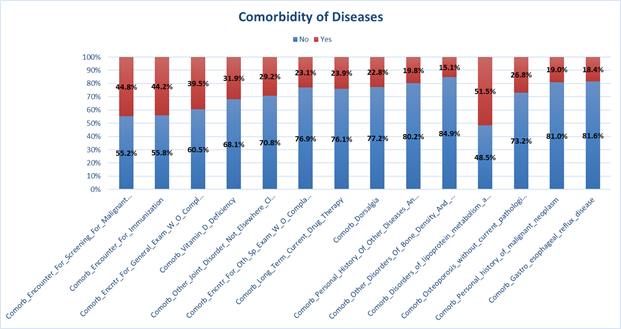

In [23]:
%cd /content/
PIL.Image.open('Comorbidity of Disases.png')

This chart shows various Risk Factors among the patients regarding the medication which related to Patient Persistency of the Drug.

/content


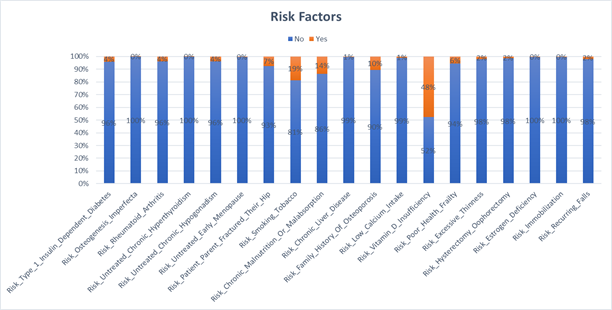

In [24]:
%cd /content/
PIL.Image.open('Risk Factors.png')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


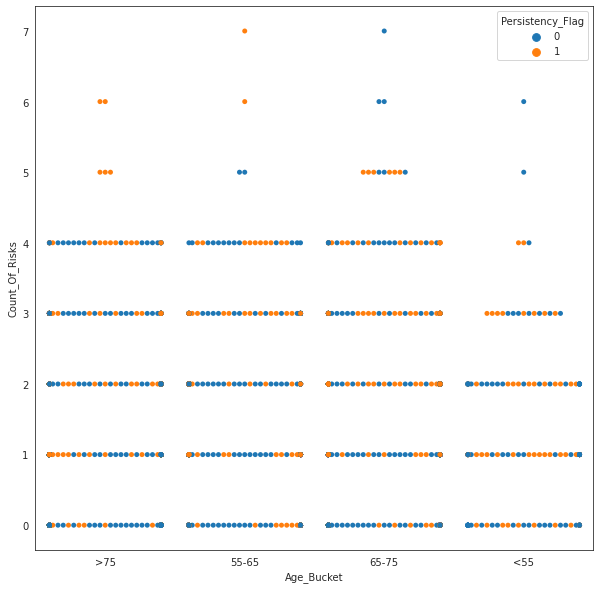

In [25]:
# checking the distribution of patients based on age and count of risk
figure(figsize=(10, 10))
sns.swarmplot(x=df["Age_Bucket"], y=df["Count_Of_Risks"], hue=df["Persistency_Flag"])

0    2135
1    1289
Name: Persistency_Flag, dtype: int64


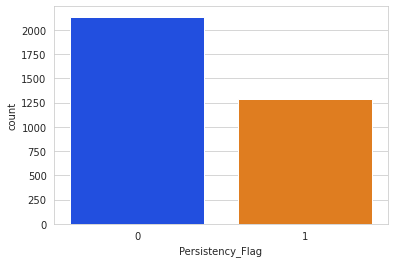

In [26]:
# checking the Persistency status counts of the patients 
sns.set_style("whitegrid")
persistency_count=df.Persistency_Flag.value_counts() 
sns.countplot(x="Persistency_Flag",data = df,palette="bright")
print(persistency_count)

## Anomaly or Imabalance in the Dataset and Data Cleansing

Check for Null or NaN values in the Dataset

In [27]:
print(f'Total NULL values in the Original DataFrame = {df.isnull().sum().sum()}')
print(df.isnull().sum()) 
pd.options.display.max_rows = 3500
df.isna().sum()

Total NULL values in the Original DataFrame = 0
Gender                      0
Race                        0
Ethnicity                   0
Region                      0
Age_Bucket                  0
                           ..
Risk_Estrogen_Deficiency    0
Risk_Immobilization         0
Risk_Recurring_Falls        0
Count_Of_Risks              0
Persistency_Flag            0
Length: 68, dtype: int64


Gender                                                                0
Race                                                                  0
Ethnicity                                                             0
Region                                                                0
Age_Bucket                                                            0
Ntm_Speciality                                                        0
Ntm_Specialist_Flag                                                   0
Ntm_Speciality_Bucket                                                 0
Gluco_Record_Prior_Ntm                                                0
Gluco_Record_During_Rx                                                0
Dexa_Freq_During_Rx                                                   0
Dexa_During_Rx                                                        0
Frag_Frac_Prior_Ntm                                                   0
Frag_Frac_During_Rx                                             

No Null values in the Dataset, which is great!

The following 3 charts show the Standard Error, Skewness and Kurtosis present in the dataset after all columns (i.e., variables) were normalized within the same range. It greatly helped in determining the imbalance and non-normality present in the dataset.

/content


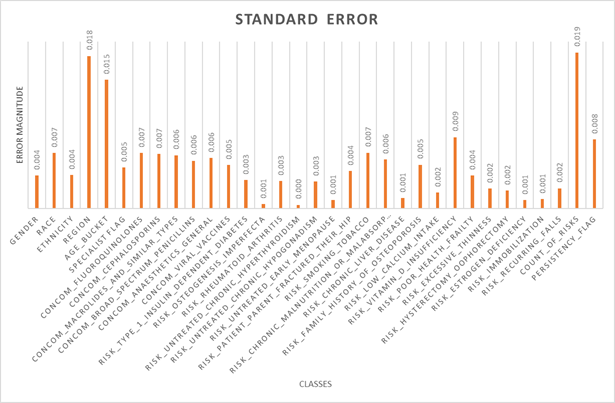

In [28]:
%cd /content/
PIL.Image.open('Standard Error.png')

/content


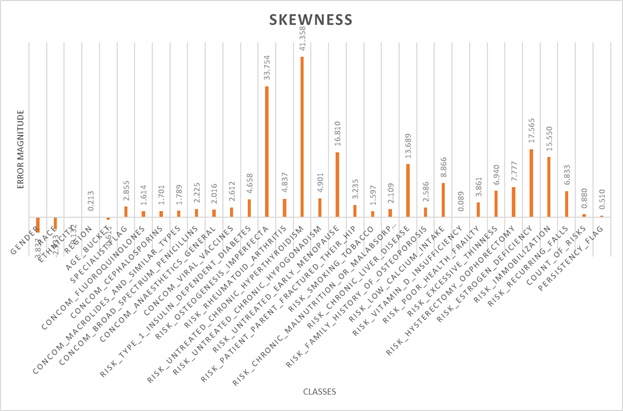

In [29]:
%cd /content/
PIL.Image.open('Skewness.png')

/content


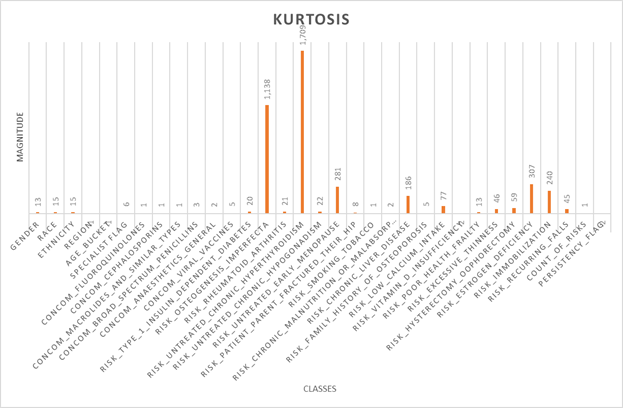

In [30]:
%cd /content/
PIL.Image.open('Kurtosis.png')

Check the correlation level among independent variables to detecting inter-dependence and redundancy among them.

In [100]:
# finding correlation matrix 
corr = df_dummy.corr()
# corr_threshold=(corr>0.3) & (corr!= 1)
corr_threshold=(corr>0.0001) & (corr!= 1)

In [101]:
df_corr = pd.DataFrame(data=corr)
df_corr.head(30)

,Female,Male,African American,Asian,Caucasian,Other/Unknown,Hispanic,Not Hispanic,Unknown,Midwest,Northeast,Other/Unknown,South,West,55-65,65-75,<55,>75,CARDIOLOGY,CLINICAL NURSE SPECIALIST,EMERGENCY MEDICINE,ENDOCRINOLOGY,GASTROENTEROLOGY,GENERAL PRACTITIONER,GERIATRIC MEDICINE,HEMATOLOGY & ONCOLOGY,HOSPICE AND PALLIATIVE MEDICINE,HOSPITAL MEDICINE,NEPHROLOGY,NEUROLOGY,NUCLEAR MEDICINE,OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,OBSTETRICS AND GYNECOLOGY,OCCUPATIONAL MEDICINE,ONCOLOGY,OPHTHALMOLOGY,ORTHOPEDIC SURGERY,ORTHOPEDICS,OTOLARYNGOLOGY,PAIN MEDICINE,...,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Persistency_Flag
Female,1.000000,-1.000000,0.010634,0.014367,-0.021522,0.011390,0.019339,0.001612,-0.022337,0.021521,-0.019377,0.013474,-0.014036,-0.001990,0.057072,0.036732,-0.050551,-0.060061,0.003897,0.004189,0.004189,-0.022454,0.005925,0.045650,-0.046360,-0.004093,0.005925,0.004189,0.007257,0.004189,0.004189,0.004189,0.040266,0.004189,0.049700,0.004189,-0.031181,0.007257,-0.004093,0.004189,...,0.062394,-0.028778,-0.026707,-0.017895,0.018859,0.017702,-0.000125,-0.023298,0.002266,-0.008049,-0.008262,0.003163,0.015011,0.006790,-0.042565,-0.012362,-0.004258,-0.013773,-0.012461,-0.058407,0.007257,0.015637,0.005925,-0.105644,0.014534,0.026439,-0.004887,-0.012372,0.000347,0.021815,0.027311,0.032103,-0.006158,-0.001859,0.031023,0.013913,-0.004093,-0.036774,-0.002931,-0.010343
Male,-1.000000,1.000000,-0.010634,-0.014367,0.021522,-0.011390,-0.019339,-0.001612,0.022337,-0.021521,0.019377,-0.013474,0.014036,0.001990,-0.057072,-0.036732,0.050551,0.060061,-0.003897,-0.004189,-0.004189,0.022454,-0.005925,-0.045650,0.046360,0.004093,-0.005925,-0.004189,-0.007257,-0.004189,-0.004189,-0.004189,-0.040266,-0.004189,-0.049700,-0.004189,0.031181,-0.007257,0.004093,-0.004189,...,-0.062394,0.028778,0.026707,0.017895,-0.018859,-0.017702,0.000125,0.023298,-0.002266,0.008049,0.008262,-0.003163,-0.015011,-0.006790,0.042565,0.012362,0.004258,0.013773,0.012461,0.058407,-0.007257,-0.015637,-0.005925,0.105644,-0.014534,-0.026439,0.004887,0.012372,-0.000347,-0.021815,-0.027311,-0.032103,0.006158,0.001859,-0.031023,-0.013913,0.004093,0.036774,0.002931,0.010343
African American,0.010634,-0.010634,1.000000,-0.026790,-0.570516,-0.028845,0.002996,0.001899,-0.005802,-0.001347,-0.031392,0.031648,0.049523,-0.054938,-0.005798,-0.008144,0.036381,-0.003334,-0.013585,-0.002887,-0.002887,0.001529,-0.004084,-0.034286,-0.004084,0.044908,-0.004084,-0.002887,0.055098,-0.002887,-0.002887,-0.002887,0.027820,-0.002887,-0.008918,-0.002887,0.003199,-0.005003,-0.010824,-0.002887,...,0.004444,-0.011130,-0.019569,-0.016893,-0.006809,-0.028360,0.006254,-0.036326,-0.020557,-0.017934,0

From the correlation matrix, it is difficult to have a complete understanding of the relations between the parameters. The low correlation values actually show a good thing that there is less relation among the independent variables, which is required for a better prediction performance of Machine Learning done in the next section. If the independent variables are too inter-related, they become redundant and performance dropped unless the redundancy is removed

## Data Transformations, Statistical and ML based Analysis, and Patient Persitency Prediction


### Create Dummy Dataset and apply Machine Learning (ML) on the Whole Dataset

It is a required step to convert Categorical Variables to Dummy Numerical Variables before applying any Machine Learning or Statistical Techniques since they can only run on numerical variables.

In [32]:
df_dummy = pd.DataFrame()

In [33]:
for i in range(0,len(df.columns)):
  if(i<=7):
    X = df[df.columns[i]]
    Y = pd.get_dummies(X)
    df_dummy = pd.concat([df_dummy, Y], axis=1)
  elif(i>7):
    X = df[df.columns[i]]
    df_dummy = pd.concat([df_dummy, X], axis=1)

In [34]:
df_dummy

Output hidden; open in https://colab.research.google.com to view.

#### Train-Test Split - 20% Test Set

In [35]:
X_Data = df_dummy.iloc[:,0:-1].values
Y_Data = df_dummy.iloc[:,-1].values

In [36]:
print(X_Data.shape)
print(Y_Data.shape)

(3424, 118)
(3424,)


In [37]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.20, random_state=42)

In [38]:
print(X_Train.shape, X_Test.shape)
print(Y_Train.shape, Y_Test.shape)

(2739, 118) (685, 118)
(2739,) (685,)


In [39]:
X_Train = X_Train.astype('int')
X_Test = X_Test.astype('int')
Y_Train = Y_Train.astype('int')
Y_Test = Y_Test.astype('int')

Now Apply ML

#### Machine Learning (ML)

##### Logistic Regression based Classifier

In [40]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error: %f" % MAE)
print("Score: %f" % Score)

Mean Absolute Error: 0.191241
Score: 0.832055


In [41]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[375,  56],
       [ 75, 179]])

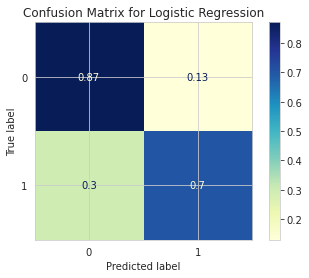

In [42]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Logistic Regression')
plt.show(matrix)

In [43]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.8087591240875912
Precision = 0.8067722731272973
Recall = 0.7873970075086322
f1-Score = 0.8071059993341674


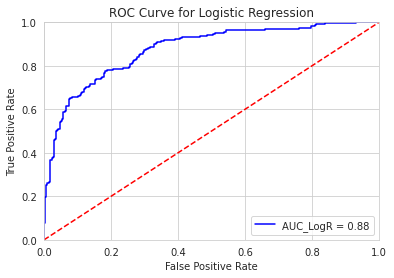

In [44]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_LogR, tpr_LogR, threshold = roc_curve(Y_Test, Probs)
roc_auc_LogR = auc(fpr_LogR, tpr_LogR)
#
plt.title('ROC Curve for Logistic Regression')
plt.plot(fpr_LogR, tpr_LogR, 'b', label = 'AUC_LogR = %0.2f' % roc_auc_LogR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,1
0,0
1,1
1,1
0,0
1,1
0,0
1,0
1,1
1,1
0,0
1,0
1,1
1,1
0,0
0,0
0,0
1,1
0,0
1,1
1,1
0,0
0,0
0,0
1,1
1,0
0,0
0,0
1,0
0,0
0,1
0,0
0,0
1,1
0,0
1,1
0,0
1,1
0,0
0,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,1
0,0
1,1
1,1
0,0
1,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
1,0
0,0
1,0
1,1
0,1
0,0
1,1
0,0
0,1
0,1
0,0
0,1
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,1
0,1
0,0
1,1
0,0
0,0
1,1
0,0
1,1
1,1
0,1
1,1
0,0
1,0
0,0
1,1
0,0
0,0
0,0
1,0
1,1
0,0
1,1
0,0
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
1,1
0,0
0,1
0,0
1,1
0,0
1,1
1,0
0,0
0,0
0,1
0,1
1,1
0,1
1,0
0,0
1,0
1,1
0,0
1,0
1,1
1,1
0,1
0,0
0,0
0,0
0,1
0,0
0,0
0,1
0,0
0,0
0,0
1,1
0,0
0,0
1,1
0,0
1,1
0,0
0,1
1,1
1,1
1,1
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,0
0,0
0,0
0,0
1,1
1,0
0,0
0,1
1,1
0,0
0,0
1,0
1,1
0,1
0,0
1,1
1,1
1,1
1,0
1,1
0,0
1,0
0,1
1,1
1,0
1,1
0,0
0,0
0,1
0,1
0,0
1,0
1,1
0,1
0,0
0,0
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,1
0,1
0,0
1,1
1,0
1,1
0,0
0,0
0,1
1,1
1,1
0,0


##### K-Nearest Neighbour (KNN) Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 19)
neigh = neigh.fit(X_Train, Y_Train)
Preds = neigh.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = neigh.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.224818
Score for Willingness: 0.804308


In [47]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[396,  35],
       [119, 135]])

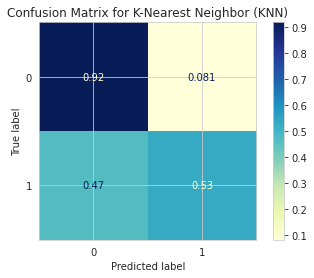

In [48]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(neigh, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for K-Nearest Neighbor (KNN)')
plt.show(matrix)

In [49]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7751824817518248
Precision = 0.7782709358989857
Recall = 0.7251447832362022
f1-Score = 0.7628941493740051


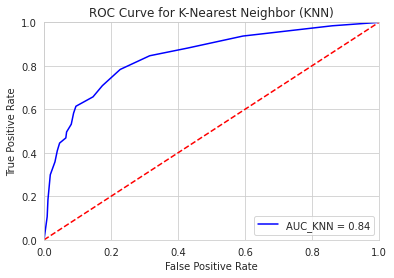

In [50]:
Probs = neigh.predict_proba(X_Test)[:,1]
fpr_KNN, tpr_KNN, threshold = roc_curve(Y_Test, Probs)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
#
plt.title('ROC Curve for K-Nearest Neighbor (KNN)')
plt.plot(fpr_KNN, tpr_KNN, 'b', label = 'AUC_KNN = %0.2f' % roc_auc_KNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
Probs.shape

(685,)

In [52]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,0
0,0
0,0
0,0
1,1
1,1
0,0
1,1
0,0
1,0
1,1
1,0
0,0
1,1
1,1
1,1
0,0
0,0
0,0
1,1
0,1
1,1
1,1
0,0
0,0
0,0
1,1
1,0
0,0
0,0
1,0
0,0
0,1
0,0
0,0
1,1
0,0
1,1
0,1
1,1
0,0
0,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
1,1
0,0
1,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
1,0
0,0
1,0
1,1
0,0
0,0
1,1
0,0
0,1
0,1
0,0
0,0
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,0
0,1
0,0
1,1
0,0
0,0
1,1
0,0
1,1
1,1
0,1
1,1
0,0
1,1
0,0
1,1
0,0
0,0
0,0
1,0
1,1
0,0
1,1
0,0
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
1,1
0,0
0,0
0,0
1,0
0,0
1,0
1,0
0,0
0,0
0,0
0,1
1,0
0,1
1,0
0,0
1,0
1,0
0,0
1,0
1,1
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
0,0
1,1
0,0
1,1
0,0
0,0
1,1
1,1
1,0
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,0
0,0
0,0
0,0
1,1
1,0
0,0
0,0
1,1
0,0
0,0
1,0
1,0
0,0
0,0
1,1
1,1
1,0
1,0
1,1
0,0
1,0
0,1
1,1
1,0
1,1
0,0
0,0
0,0
0,0
0,1
1,0
1,1
0,0
0,0
0,1
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
1,1
0,0
0,0
1,0
1,0
1,1
0,0
0,0
0,0
1,1
1,1
0,0


##### Support Vector Machine (SVM) Classifier(s) - SVCs

In [53]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability= True))
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.213139
Score for Willingness: 0.898138


In [54]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[373,  58],
       [ 88, 166]])

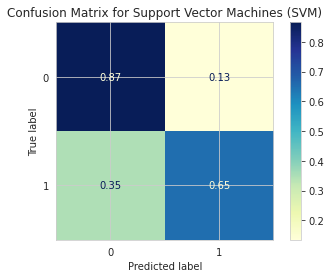

In [55]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Support Vector Machines (SVM)')
plt.show(matrix)

In [56]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7868613138686131
Precision = 0.7838814948687963
Recall = 0.7594862707126806
f1-Score = 0.7837570321058592


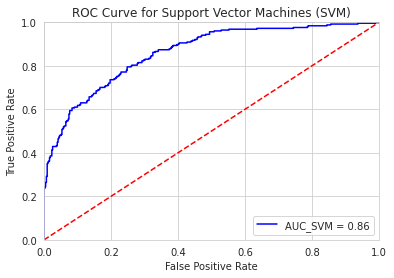

In [57]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_SVM, tpr_SVM, threshold = roc_curve(Y_Test, Probs)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
#
plt.title('ROC Curve for Support Vector Machines (SVM)')
plt.plot(fpr_SVM, tpr_SVM, 'b', label = 'AUC_SVM = %0.2f' % roc_auc_SVM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Stochastic Gradient Descent (SGD) Classifier

In [58]:
from sklearn.linear_model import SGDClassifier
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3, loss='log'))
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.240876
Score for Willingness: 0.774370


In [59]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[338,  93],
       [ 72, 182]])

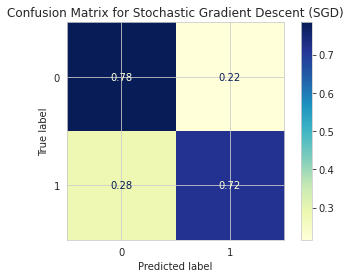

In [60]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Stochastic Gradient Descent (SGD)')
plt.show(matrix)

In [61]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7591240875912408
Precision = 0.7641080486186416
Recall = 0.7503790854449458
f1-Score = 0.7608978097759905


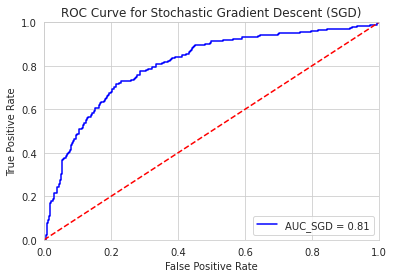

In [62]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_SGD, tpr_SGD, threshold = roc_curve(Y_Test, Probs)
roc_auc_SGD = auc(fpr_SGD, tpr_SGD)
#
plt.title('ROC Curve for Stochastic Gradient Descent (SGD)')
plt.plot(fpr_SGD, tpr_SGD, 'b', label = 'AUC_SGD = %0.2f' % roc_auc_SGD)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.272993
Score for Willingness: 1.000000


In [64]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[334,  97],
       [ 90, 164]])

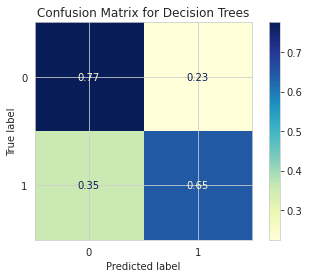

In [65]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Decision Trees')
plt.show(matrix)

In [66]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.727007299270073
Precision = 0.728636034321819
Recall = 0.7103056433491057
f1-Score = 0.7277450754896122


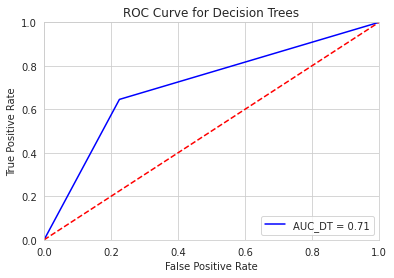

In [67]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_DT, tpr_DT, threshold = roc_curve(Y_Test, Probs)
roc_auc_DT = auc(fpr_DT, tpr_DT)
#
plt.title('ROC Curve for Decision Trees')
plt.plot(fpr_DT, tpr_DT, 'b', label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### GradBoost Classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.191241
Score for Willingness: 0.866009


In [69]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[378,  53],
       [ 78, 176]])

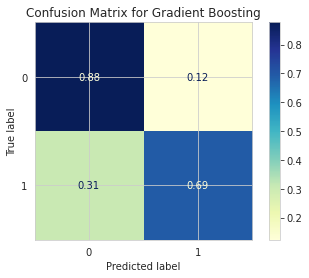

In [70]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show(matrix)

In [71]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.8087591240875912
Precision = 0.8065551672826283
Recall = 0.7849717741198823
f1-Score = 0.8065048778593307


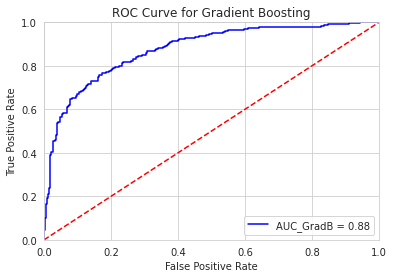

In [72]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_GradB, tpr_GradB, threshold = roc_curve(Y_Test, Probs)
roc_auc_GradB = auc(fpr_GradB, tpr_GradB)
#
plt.title('ROC Curve for Gradient Boosting')
plt.plot(fpr_GradB, tpr_GradB, 'b', label = 'AUC_GradB = %0.2f' % roc_auc_GradB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.194161
Score for Willingness: 1.000000


In [74]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[381,  50],
       [ 83, 171]])

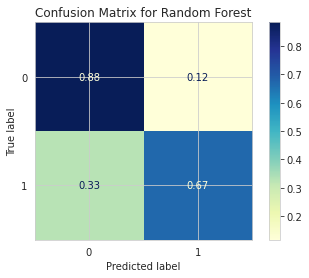

In [75]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Random Forest')
plt.show(matrix)

In [76]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.8058394160583942
Precision = 0.8035575969240336
Recall = 0.7786095328571168
f1-Score = 0.8026743873098722


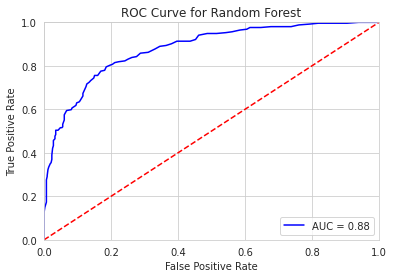

In [77]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_RF, tpr_RF, threshold = roc_curve(Y_Test, Probs)
roc_auc_RF = auc(fpr_RF, tpr_RF)
#
plt.title('ROC Curve for Random Forest')
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [78]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,1
0,0
1,1
1,1
0,0
1,1
0,0
1,0
1,1
1,1
0,0
1,1
1,1
1,1
0,0
0,0
0,0
1,1
0,0
1,1
1,1
0,0
0,0
0,0
1,1
1,0
0,0
0,0
1,1
0,0
0,1
0,0
0,0
1,1
0,0
1,1
0,1
1,1
0,0
0,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
1,1
0,0
1,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
1,0
0,0
1,0
1,1
0,0
0,0
1,1
0,0
0,1
0,1
0,0
0,1
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,1
0,1
0,0
1,1
0,0
0,0
1,1
0,0
1,1
1,1
0,1
1,1
0,0
1,1
0,0
1,1
0,0
0,0
0,0
1,0
1,1
0,0
1,1
0,0
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,1
0,0
1,1
0,0
0,1
0,0
1,1
0,0
1,1
1,0
0,0
0,1
0,1
0,1
1,0
0,1
1,0
0,0
1,0
1,0
0,0
1,0
1,1
1,1
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
0,0
1,1
0,0
1,1
0,0
0,0
1,1
1,1
1,1
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,0
0,0
0,0
0,0
1,1
1,0
0,0
0,1
1,1
0,0
0,0
1,0
1,0
0,1
0,0
1,1
1,1
1,1
1,0
1,1
0,0
1,0
0,1
1,1
1,0
1,1
0,0
0,0
0,1
0,1
0,1
1,1
1,1
0,1
0,0
0,1
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
1,1
0,1
0,0
1,1
1,0
1,1
0,0
0,0
0,1
1,1
1,1
0,0


##### Extra-Trees Classifier

In [79]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.205839
Score for Willingness: 1.000000


In [80]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[371,  60],
       [ 81, 173]])

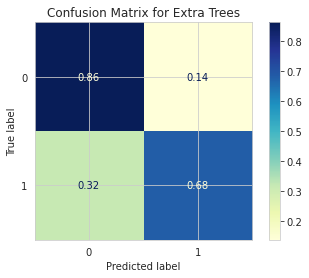

In [81]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Extra Trees')
plt.show(matrix)

In [82]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7941605839416058
Precision = 0.7917599255684595
Recall = 0.7709456126568865
f1-Score = 0.7921702618597288


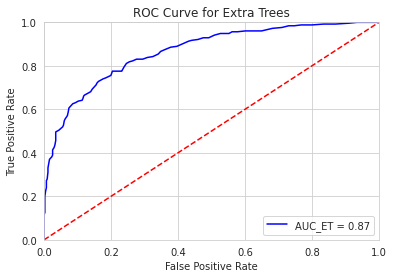

In [83]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_ET, tpr_ET, threshold = roc_curve(Y_Test, Probs)
roc_auc_ET = auc(fpr_ET, tpr_ET)
#
plt.title('ROC Curve for Extra Trees')
plt.plot(fpr_ET, tpr_ET, 'b', label = 'AUC_ET = %0.2f' % roc_auc_ET)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### AdaBoost Classifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.185401
Score for Willingness: 0.829865


In [85]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[377,  54],
       [ 73, 181]])

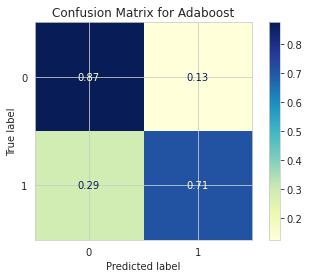

In [86]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Adaboost')
plt.show(matrix)

In [87]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.8145985401459854
Precision = 0.8127244741246915
Recall = 0.7936542009974972
f1-Score = 0.8129958924842692


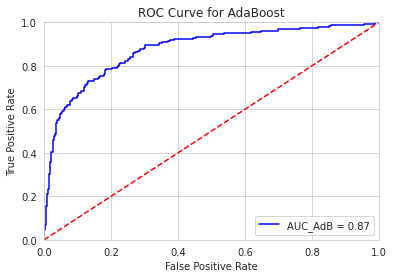

In [88]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_AdB, tpr_AdB, threshold = roc_curve(Y_Test, Probs)
roc_auc_AdB = auc(fpr_AdB, tpr_AdB)
#
plt.title('ROC Curve for AdaBoost')
plt.plot(fpr_AdB, tpr_AdB, 'b', label = 'AUC_AdB = %0.2f' % roc_auc_AdB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### XgBoost Classifier

In [89]:
import xgboost as xgb
clf = xgb.XGBClassifier(objective='reg:tweedie')
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.205839
Score for Willingness: 0.849215


In [90]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[400,  31],
       [110, 144]])

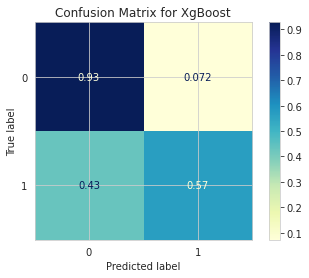

In [91]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for XgBoost')
plt.show(matrix)

In [92]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7941605839416058
Precision = 0.7986057371853852
Recall = 0.7475016898989715
f1-Score = 0.7838484467509343


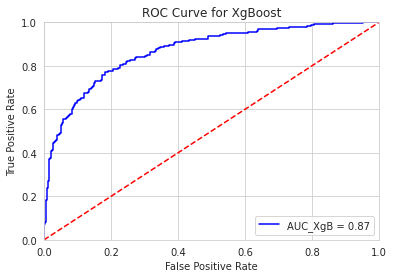

In [93]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_XgB, tpr_XgB, threshold = roc_curve(Y_Test, Probs)
roc_auc_XgB = auc(fpr_XgB, tpr_XgB)
#
plt.title('ROC Curve for XgBoost')
plt.plot(fpr_XgB, tpr_XgB, 'b', label = 'AUC_XgB = %0.2f' % roc_auc_XgB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Multi-Layer Perceptron (MLP) Classifier

In [175]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=1000)
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.315328
Score for Willingness: 0.778021


In [95]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[344,  87],
       [ 83, 171]])

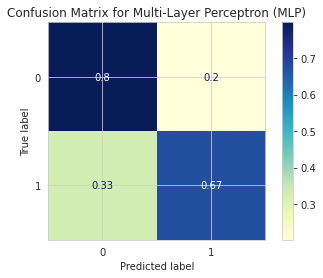

In [96]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Multi-Layer Perceptron (MLP)')
plt.show(matrix)

In [97]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7518248175182481
Precision = 0.7526588607954737
Recall = 0.7356860989824068
f1-Score = 0.7522157548959556


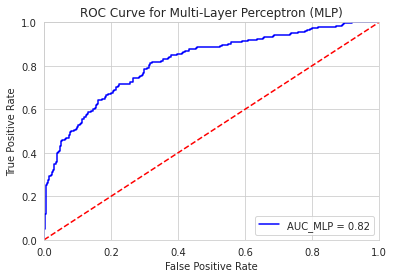

In [98]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_MLP, tpr_MLP, threshold = roc_curve(Y_Test, Probs)
roc_auc_MLP = auc(fpr_MLP, tpr_MLP)
#
plt.title('ROC Curve for Multi-Layer Perceptron (MLP)')
plt.plot(fpr_MLP, tpr_MLP, 'b', label = 'AUC_MLP = %0.2f' % roc_auc_MLP)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Combined ROC Plot(s)

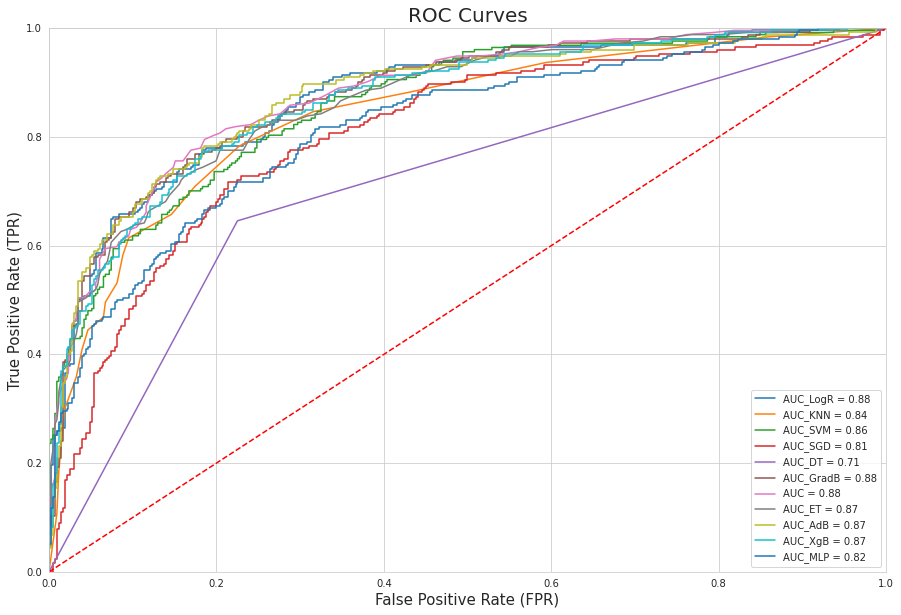

In [99]:
plt.figure(figsize = (15,10))
plt.title('ROC Curves', fontsize = 20)
plt.plot(fpr_LogR, tpr_LogR, label = 'AUC_LogR = %0.2f' % roc_auc_LogR)
plt.plot(fpr_KNN, tpr_KNN, label = 'AUC_KNN = %0.2f' % roc_auc_KNN)
plt.plot(fpr_SVM, tpr_SVM, label = 'AUC_SVM = %0.2f' % roc_auc_SVM)
plt.plot(fpr_SGD, tpr_SGD, label = 'AUC_SGD = %0.2f' % roc_auc_SGD)
plt.plot(fpr_DT, tpr_DT, label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.plot(fpr_GradB, tpr_GradB, label = 'AUC_GradB = %0.2f' % roc_auc_GradB)
plt.plot(fpr_RF, tpr_RF, label = 'AUC = %0.2f' % roc_auc_RF)
plt.plot(fpr_ET, tpr_ET, label = 'AUC_ET = %0.2f' % roc_auc_ET)
plt.plot(fpr_AdB, tpr_AdB, label = 'AUC_AdB = %0.2f' % roc_auc_AdB)
plt.plot(fpr_XgB, tpr_XgB, label = 'AUC_XgB = %0.2f' % roc_auc_XgB)
plt.plot(fpr_MLP, tpr_MLP, label = 'AUC_MLP = %0.2f' % roc_auc_MLP)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)', fontsize = 15)
plt.xlabel('False Positive Rate (FPR)', fontsize = 15)
plt.show()

### Dominance Analysis to Create Dominant Subset and apply ML

In [ ]:
!pip install dominance-analysis

In [104]:
%cd /content/
df_dummy_DA = pd.read_excel('Dataset_DA.xlsx',sheet_name= 'Dataset')

/content


In [105]:
df_dummy_DA.head(10)

,Gender,Race,Ethnicity,Region,Age_Bucket,CARDIOLOGY,CLINICAL NURSE SPECIALIST,EMERGENCY MEDICINE,ENDOCRINOLOGY,GASTROENTEROLOGY,GENERAL PRACTITIONER,GERIATRIC MEDICINE,HEMATOLOGY & ONCOLOGY,HOSPICE AND PALLIATIVE MEDICINE,HOSPITAL MEDICINE,NEPHROLOGY,NEUROLOGY,NUCLEAR MEDICINE,OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,OBSTETRICS AND GYNECOLOGY,OCCUPATIONAL MEDICINE,ONCOLOGY,OPHTHALMOLOGY,ORTHOPEDIC SURGERY,ORTHOPEDICS,OTOLARYNGOLOGY,PAIN MEDICINE,PATHOLOGY,PEDIATRICS,PHYSICAL MEDICINE AND REHABILITATION,PLASTIC SURGERY,PODIATRY,PSYCHIATRY AND NEUROLOGY,PULMONARY MEDICINE,RADIOLOGY,RHEUMATOLOGY,SURGERY AND SURGICAL SPECIALTIES,TRANSPLANT SURGERY,UROLOGY,Unknown,VASCULAR SURGERY,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Persistency_Flag
0,0,2,1,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,0,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0
3,1,2,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,2,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1,2,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2,0
6,1,2,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1,2,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8,1,2,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9,1,2,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from dominance_analysis import Dominance
dominance_classification = Dominance(data=df_dummy_DA, target='Persistency_Flag', objective=1, pseudo_r2="mcfadden")

In [ ]:
incr_variable_rsquare = dominance_classification.incremental_rsquare()

In [ ]:
plt.show(dominance_classification.plot_incremental_rsquare())

In [ ]:
dominance_classification.dominance_stats()

In [ ]:
dominance_classification.dominance_level()

As it can be seen from Dominance Analysis the top parameters are the strongest predictors of the target variable. Now, taking the top 15 most influential parameters, a new dataset is formed which is also used in Machine Learning process to compare its performance with the whole dataset and evaluate the robustness of the data transformation process.

In [106]:
df_Transformed = pd.DataFrame()

In [107]:
df_Transformed = df_dummy_DA[["Concom_Viral_Vaccines", "Concom_Macrolides_And_Similar_Types", 
                              "Concom_Anaesthetics_General", "Concom_Broad_Spectrum_Penicillins", "Concom_Cephalosporins",
                              "ONCOLOGY", "Concom_Fluoroquinolones", "ENDOCRINOLOGY", "GENERAL PRACTITIONER", 
                              "Risk_Vitamin_D_Insufficiency", "Risk_Untreated_Chronic_Hypogonadism", "CARDIOLOGY", 
                              "Risk_Smoking_Tobacco", "Count_Of_Risks", "Risk_Rheumatoid_Arthritis", "Persistency_Flag"]]

In [108]:
df_Transformed.head(10)

,Concom_Viral_Vaccines,Concom_Macrolides_And_Similar_Types,Concom_Anaesthetics_General,Concom_Broad_Spectrum_Penicillins,Concom_Cephalosporins,ONCOLOGY,Concom_Fluoroquinolones,ENDOCRINOLOGY,GENERAL PRACTITIONER,Risk_Vitamin_D_Insufficiency,Risk_Untreated_Chronic_Hypogonadism,CARDIOLOGY,Risk_Smoking_Tobacco,Count_Of_Risks,Risk_Rheumatoid_Arthritis,Persistency_Flag
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0,0
6,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [109]:
%cd /content/GDrive/MyDrive/Colab Notebooks/DG_Internship/Project Health+
df_Transformed.to_excel('Dataset_Transformed_DA.xlsx', sheet_name= 'Transformed_Dataset')
%cd /content/

/content/GDrive/MyDrive/Colab Notebooks/DG_Internship/Project Health+
/content


#### Train-Test Split - 20% Test Set

In [110]:
X_Data = df_Transformed.iloc[:,0:-1].values
Y_Data = df_Transformed.iloc[:,-1].values

In [111]:
print(X_Data.shape)
print(Y_Data.shape)

(3424, 15)
(3424,)


In [112]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.20, random_state=42)

In [113]:
print(X_Train.shape, X_Test.shape)
print(Y_Train.shape, Y_Test.shape)

(2739, 15) (685, 15)
(2739,) (685,)


In [114]:
X_Train = X_Train.astype('int')
X_Test = X_Test.astype('int')
Y_Train = Y_Train.astype('int')
Y_Test = Y_Test.astype('int')

Now Apply ML

#### Machine Learning (ML)

##### Logistic Regression based Classifier

In [115]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error: %f" % MAE)
print("Score: %f" % Score)

Mean Absolute Error: 0.270073
Score: 0.718145


In [116]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[376,  55],
       [130, 124]])

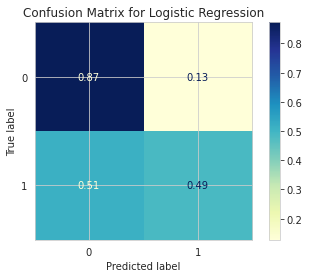

In [117]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Logistic Regression')
plt.show(matrix)

In [118]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7299270072992701
Precision = 0.7244147181987258
Recall = 0.6802893837806236
f1-Score = 0.7173459982757199


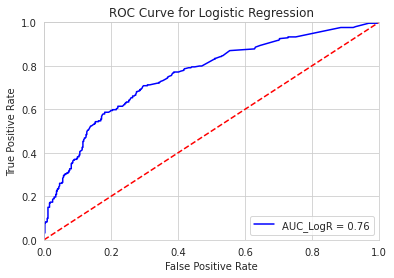

In [119]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_LogR, tpr_LogR, threshold = roc_curve(Y_Test, Probs)
roc_auc_LogR = auc(fpr_LogR, tpr_LogR)
#
plt.title('ROC Curve for Logistic Regression')
plt.plot(fpr_LogR, tpr_LogR, 'b', label = 'AUC_LogR = %0.2f' % roc_auc_LogR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [120]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,0
0,0
1,0
1,0
0,0
1,0
0,0
1,1
1,1
1,1
0,0
1,0
1,1
1,1
0,0
0,0
0,0
1,1
0,0
1,1
1,1
0,0
0,0
0,0
1,1
1,0
0,1
0,0
1,0
0,0
0,0
0,0
0,0
1,0
0,0
1,1
0,1
1,1
0,0
0,0
0,0
1,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,1
0,0
1,1
1,1
0,0
1,0
0,0
1,0
0,0
0,0
1,1
0,0
0,0
0,0
1,0
0,0
1,0
1,1
0,0
0,0
1,0
0,0
0,0
0,1
0,1
0,1
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,1
0,0
0,0
1,1
0,1
0,0
1,0
0,0
1,0
1,1
0,0
1,1
0,0
1,0
0,0
1,0
0,0
0,0
0,0
1,0
1,1
0,0
1,0
0,0
0,0
0,1
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
1,0
0,0
0,1
0,0
1,0
0,0
1,0
1,0
0,0
0,0
0,1
0,0
1,0
0,0
1,0
0,1
1,0
1,1
0,0
1,0
1,1
1,1
0,1
0,1
0,0
0,0
0,1
0,0
0,0
0,1
0,0
0,0
0,0
1,0
0,0
0,0
1,0
0,0
1,1
0,0
0,0
1,0
1,0
1,1
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,1
0,0
0,0
0,0
1,0
1,0
0,0
0,1
1,1
0,0
0,0
1,0
1,1
0,1
0,0
1,0
1,1
1,0
1,0
1,1
0,0
1,0
0,0
1,0
1,0
1,1
0,0
0,0
0,0
0,0
0,0
1,1
1,1
0,1
0,0
0,0
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
0,0
1,1
1,0
1,0
0,0
0,0
0,0
1,1
1,1
0,0


##### K-Nearest Neighbour (KNN) Classifier

In [121]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 19)
neigh = neigh.fit(X_Train, Y_Train)
Preds = neigh.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = neigh.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.306569
Score for Willingness: 0.709018


In [122]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[374,  57],
       [153, 101]])

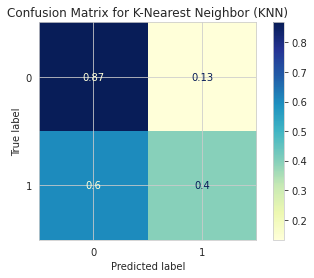

In [123]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(neigh, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for K-Nearest Neighbor (KNN)')
plt.show(matrix)

In [124]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.6934306569343066
Precision = 0.6835592063496795
Recall = 0.6326936076145935
f1-Score = 0.6730743083950114


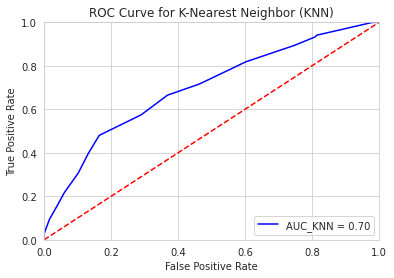

In [125]:
Probs = neigh.predict_proba(X_Test)[:,1]
fpr_KNN, tpr_KNN, threshold = roc_curve(Y_Test, Probs)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
#
plt.title('ROC Curve for K-Nearest Neighbor (KNN)')
plt.plot(fpr_KNN, tpr_KNN, 'b', label = 'AUC_KNN = %0.2f' % roc_auc_KNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [126]:
Probs.shape

(685,)

In [127]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,0
0,0
1,0
1,0
0,1
1,0
0,0
1,0
1,0
1,1
0,0
1,0
1,1
1,0
0,0
0,0
0,0
1,1
0,0
1,1
1,1
0,0
0,1
0,0
1,1
1,0
0,1
0,0
1,1
0,0
0,0
0,1
0,0
1,1
0,0
1,1
0,0
1,0
0,0
0,0
0,0
1,0
0,0
0,0
1,0
0,0
0,0
0,0
0,1
0,0
0,0
0,1
0,0
1,1
1,1
0,0
1,0
0,0
1,0
0,0
0,0
1,0
0,0
0,0
0,0
1,0
0,0
1,0
1,1
0,1
0,0
1,0
0,0
0,0
0,1
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,0
0,1
0,0
1,1
0,1
0,0
1,0
0,0
1,1
1,1
0,1
1,1
0,0
1,0
0,0
1,0
0,1
0,0
0,1
1,0
1,0
0,0
1,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,1
1,0
0,0
1,1
1,0
0,0
0,0
0,1
0,0
1,0
0,0
1,0
0,1
1,0
1,0
0,0
1,0
1,1
1,1
0,0
0,1
0,0
0,0
0,0
0,0
0,0
0,1
0,0
0,0
0,0
1,1
0,0
0,0
1,0
0,0
1,1
0,0
0,0
1,0
1,0
1,1
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
0,0
0,0
0,0
1,0
1,0
0,0
0,0
1,1
0,0
0,0
1,0
1,0
0,1
0,0
1,0
1,1
1,0
1,0
1,1
0,0
1,0
0,0
1,0
1,0
1,1
0,0
0,0
0,0
0,1
0,0
1,1
1,0
0,1
0,0
0,0
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
0,1
1,1
1,0
1,0
0,0
0,0
0,0
1,0
1,1
0,0


##### Support Vector Machine (SVM) Classifier(s) - SVCs

In [128]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability= True))
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.277372
Score for Willingness: 0.748083


In [129]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[352,  79],
       [111, 143]])

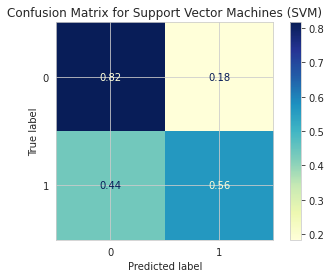

In [130]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Support Vector Machines (SVM)')
plt.show(matrix)

In [131]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7226277372262774
Precision = 0.7172033852206008
Recall = 0.689848731205583
f1-Score = 0.7182684566502836


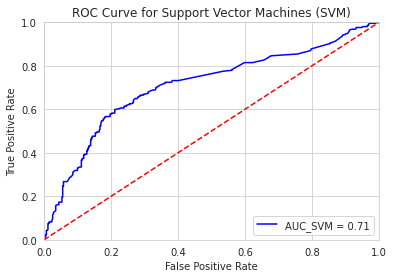

In [132]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_SVM, tpr_SVM, threshold = roc_curve(Y_Test, Probs)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
#
plt.title('ROC Curve for Support Vector Machines (SVM)')
plt.plot(fpr_SVM, tpr_SVM, 'b', label = 'AUC_SVM = %0.2f' % roc_auc_SVM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Stochastic Gradient Descent (SGD) Classifier

In [133]:
from sklearn.linear_model import SGDClassifier
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3, loss='log'))
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.278832
Score for Willingness: 0.709383


In [134]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[373,  58],
       [133, 121]])

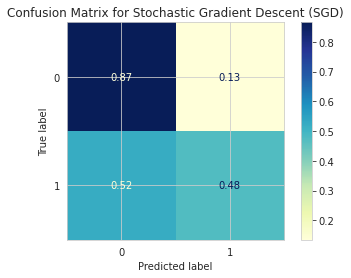

In [135]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Stochastic Gradient Descent (SGD)')
plt.show(matrix)

In [136]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7211678832116788
Precision = 0.7144697266533201
Recall = 0.6709035935473263
f1-Score = 0.7081788414630404


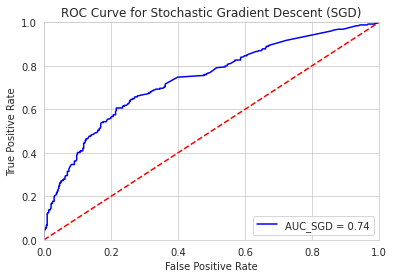

In [137]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_SGD, tpr_SGD, threshold = roc_curve(Y_Test, Probs)
roc_auc_SGD = auc(fpr_SGD, tpr_SGD)
#
plt.title('ROC Curve for Stochastic Gradient Descent (SGD)')
plt.plot(fpr_SGD, tpr_SGD, 'b', label = 'AUC_SGD = %0.2f' % roc_auc_SGD)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Decision Tree Classifier

In [138]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.347445
Score for Willingness: 0.809419


In [139]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[358,  73],
       [165,  89]])

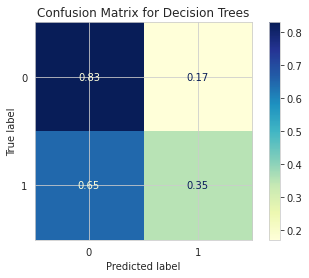

In [140]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Decision Trees')
plt.show(matrix)

In [141]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.6525547445255474
Precision = 0.6344059364570825
Recall = 0.5905100754517054
f1-Score = 0.630888442763529


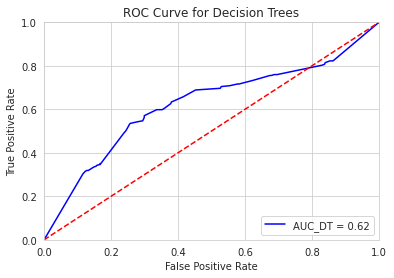

In [142]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_DT, tpr_DT, threshold = roc_curve(Y_Test, Probs)
roc_auc_DT = auc(fpr_DT, tpr_DT)
#
plt.title('ROC Curve for Decision Trees')
plt.plot(fpr_DT, tpr_DT, 'b', label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### GradBoost Classifier

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.283212
Score for Willingness: 0.730194


In [144]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[358,  73],
       [121, 133]])

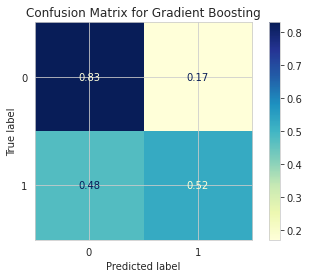

In [145]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show(matrix)

In [146]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7167883211678832
Precision = 0.7096577404707591
Recall = 0.6771242486800519
f1-Score = 0.7094813786657648


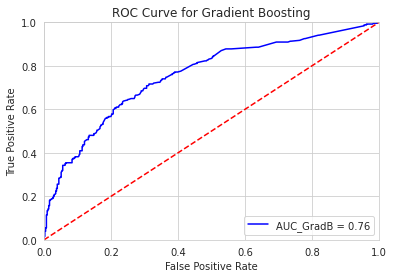

In [147]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_GradB, tpr_GradB, threshold = roc_curve(Y_Test, Probs)
roc_auc_GradB = auc(fpr_GradB, tpr_GradB)
#
plt.title('ROC Curve for Gradient Boosting')
plt.plot(fpr_GradB, tpr_GradB, 'b', label = 'AUC_GradB = %0.2f' % roc_auc_GradB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.329927
Score for Willingness: 0.809419


In [149]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[343,  88],
       [138, 116]])

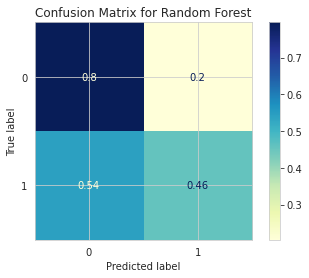

In [150]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Random Forest')
plt.show(matrix)

In [151]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.67007299270073
Precision = 0.6595277180936262
Recall = 0.6262582896395491
f1-Score = 0.6611079283169515


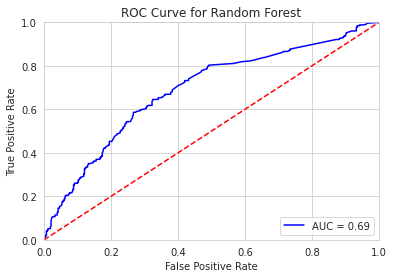

In [152]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_RF, tpr_RF, threshold = roc_curve(Y_Test, Probs)
roc_auc_RF = auc(fpr_RF, tpr_RF)
#
plt.title('ROC Curve for Random Forest')
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [153]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,1
0,0
1,0
1,0
0,1
1,0
0,0
1,0
1,0
1,1
0,0
1,0
1,1
1,0
0,1
0,0
0,0
1,1
0,0
1,1
1,0
0,0
0,1
0,0
1,1
1,0
0,1
0,0
1,1
0,0
0,0
0,1
0,0
1,0
0,0
1,1
0,1
1,0
0,0
0,0
0,0
1,0
0,0
0,0
1,0
0,0
0,0
0,0
0,1
0,0
0,0
0,1
0,1
1,1
1,0
0,0
1,1
0,0
1,0
0,0
0,0
1,1
0,0
0,0
0,0
1,0
0,1
1,0
1,1
0,1
0,0
1,0
0,0
0,0
0,1
0,0
0,1
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,1
0,1
0,0
1,1
0,1
0,1
1,0
0,0
1,0
1,1
0,0
1,1
0,1
1,0
0,0
1,1
0,0
0,0
0,0
1,0
1,0
0,0
1,0
0,0
0,1
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
1,0
0,0
0,1
0,1
1,0
0,0
1,1
1,0
0,0
0,0
0,1
0,0
1,0
0,0
1,0
0,1
1,0
1,1
0,0
1,0
1,1
1,0
0,1
0,1
0,0
0,1
0,1
0,0
0,0
0,1
0,0
0,0
0,0
1,1
0,1
0,0
1,0
0,1
1,1
0,0
0,0
1,0
1,0
1,1
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,1
0,0
0,0
0,0
1,0
1,0
0,0
0,1
1,0
0,0
0,0
1,0
1,1
0,0
0,0
1,0
1,1
1,0
1,0
1,1
0,0
1,0
0,0
1,1
1,0
1,1
0,0
0,0
0,0
0,1
0,0
1,1
1,1
0,1
0,1
0,0
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
0,1
1,0
1,0
1,0
0,0
0,0
0,0
1,0
1,1
0,0


##### Extra-Trees Classifier

In [154]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.341606
Score for Willingness: 0.809419


In [155]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[355,  76],
       [158,  96]])

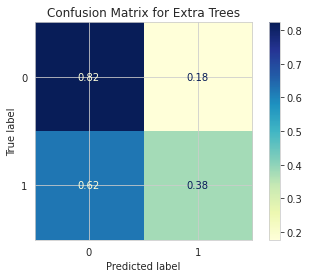

In [156]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Extra Trees')
plt.show(matrix)

In [157]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.6583941605839416
Precision = 0.6423690547215282
Recall = 0.6008093245884867
f1-Score = 0.6403532975659225


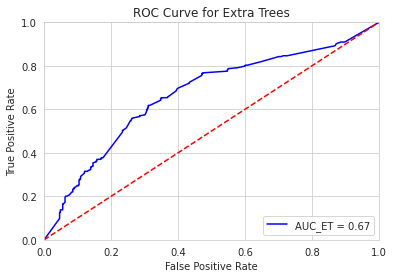

In [158]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_ET, tpr_ET, threshold = roc_curve(Y_Test, Probs)
roc_auc_ET = auc(fpr_ET, tpr_ET)
#
plt.title('ROC Curve for Extra Trees')
plt.plot(fpr_ET, tpr_ET, 'b', label = 'AUC_ET = %0.2f' % roc_auc_ET)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### AdaBoost Classifier

In [159]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.277372
Score for Willingness: 0.717780


In [160]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[376,  55],
       [135, 119]])

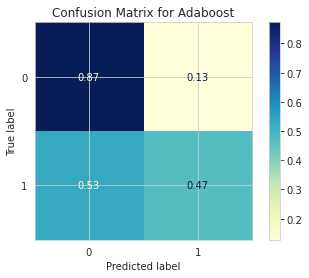

In [161]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Adaboost')
plt.show(matrix)

In [162]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7226277372262774
Precision = 0.7165659460326546
Recall = 0.6704468640955843
f1-Score = 0.70848311124996


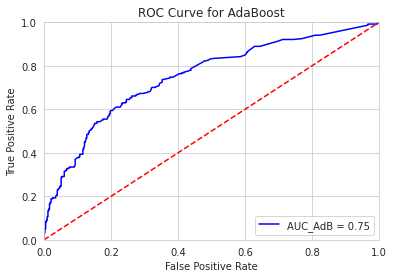

In [163]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_AdB, tpr_AdB, threshold = roc_curve(Y_Test, Probs)
roc_auc_AdB = auc(fpr_AdB, tpr_AdB)
#
plt.title('ROC Curve for AdaBoost')
plt.plot(fpr_AdB, tpr_AdB, 'b', label = 'AUC_AdB = %0.2f' % roc_auc_AdB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### XgBoost Classifier

In [164]:
import xgboost as xgb
clf = xgb.XGBClassifier(objective='reg:tweedie')
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.281752
Score for Willingness: 0.726177


In [165]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[377,  54],
       [139, 115]])

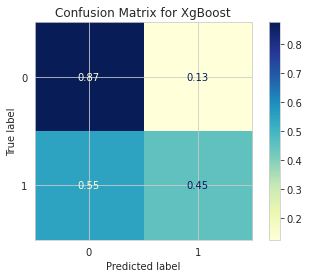

In [166]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for XgBoost')
plt.show(matrix)

In [167]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7182481751824817
Precision = 0.7120255817636437
Recall = 0.6637329411549775
f1-Score = 0.702584393977966


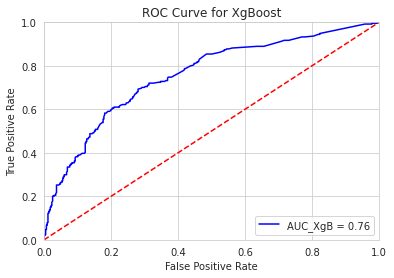

In [168]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_XgB, tpr_XgB, threshold = roc_curve(Y_Test, Probs)
roc_auc_XgB = auc(fpr_XgB, tpr_XgB)
#
plt.title('ROC Curve for XgBoost')
plt.plot(fpr_XgB, tpr_XgB, 'b', label = 'AUC_XgB = %0.2f' % roc_auc_XgB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Multi-Layer Perceptron (MLP) Classifier

In [169]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=1000)
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.315328
Score for Willingness: 0.778021


In [170]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[344,  87],
       [129, 125]])

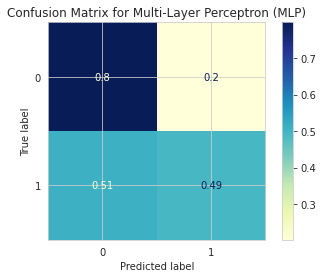

In [171]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Multi-Layer Perceptron (MLP)')
plt.show(matrix)

In [172]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.6846715328467153
Precision = 0.6762316735736376
Recall = 0.6451349178800445
f1-Score = 0.6777865599060513


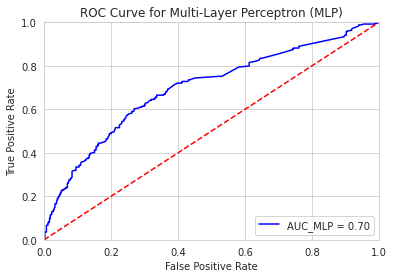

In [173]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_MLP, tpr_MLP, threshold = roc_curve(Y_Test, Probs)
roc_auc_MLP = auc(fpr_MLP, tpr_MLP)
#
plt.title('ROC Curve for Multi-Layer Perceptron (MLP)')
plt.plot(fpr_MLP, tpr_MLP, 'b', label = 'AUC_MLP = %0.2f' % roc_auc_MLP)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Combined ROC Plot(s)

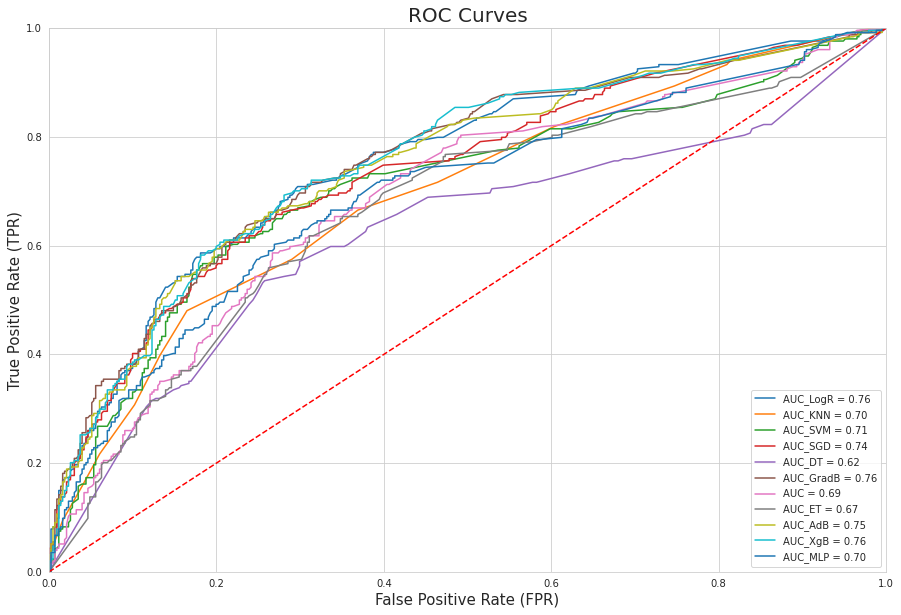

In [174]:
plt.figure(figsize = (15,10))
plt.title('ROC Curves', fontsize = 20)
plt.plot(fpr_LogR, tpr_LogR, label = 'AUC_LogR = %0.2f' % roc_auc_LogR)
plt.plot(fpr_KNN, tpr_KNN, label = 'AUC_KNN = %0.2f' % roc_auc_KNN)
plt.plot(fpr_SVM, tpr_SVM, label = 'AUC_SVM = %0.2f' % roc_auc_SVM)
plt.plot(fpr_SGD, tpr_SGD, label = 'AUC_SGD = %0.2f' % roc_auc_SGD)
plt.plot(fpr_DT, tpr_DT, label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.plot(fpr_GradB, tpr_GradB, label = 'AUC_GradB = %0.2f' % roc_auc_GradB)
plt.plot(fpr_RF, tpr_RF, label = 'AUC = %0.2f' % roc_auc_RF)
plt.plot(fpr_ET, tpr_ET, label = 'AUC_ET = %0.2f' % roc_auc_ET)
plt.plot(fpr_AdB, tpr_AdB, label = 'AUC_AdB = %0.2f' % roc_auc_AdB)
plt.plot(fpr_XgB, tpr_XgB, label = 'AUC_XgB = %0.2f' % roc_auc_XgB)
plt.plot(fpr_MLP, tpr_MLP, label = 'AUC_MLP = %0.2f' % roc_auc_MLP)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)', fontsize = 15)
plt.xlabel('False Positive Rate (FPR)', fontsize = 15)
plt.show()

### Feature Extraction using  Autoencoder and apply ML on the Feature Set

Train-Test Split Dataset - 20% for Testing

In [176]:
X_Data = df_dummy.iloc[:,0:-1].values
Y_Data = df_dummy.iloc[:,-1].values

In [177]:
print(X_Data.shape)
print(Y_Data.shape)

(3424, 118)
(3424,)


In [178]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.20, random_state=42)

In [179]:
print(X_Train.shape, X_Test.shape)
print(Y_Train.shape, Y_Test.shape)

(2739, 118) (685, 118)
(2739,) (685,)


In [180]:
X_Train = X_Train.astype('int')
X_Test = X_Test.astype('int')
Y_Train = Y_Train.astype('int')
Y_Test = Y_Test.astype('int')

Prepare U-Net based AutoEncoder

In [181]:
from Unet_1DCNN import Unet

Representation of the U-Net Segmentation Model

/content


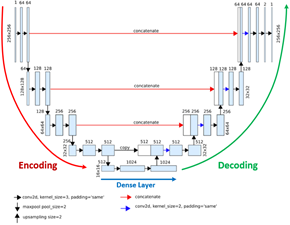

In [182]:
%cd /content/
PIL.Image.open('Unet_Model.png')

Autoencoder Pipeline

/content


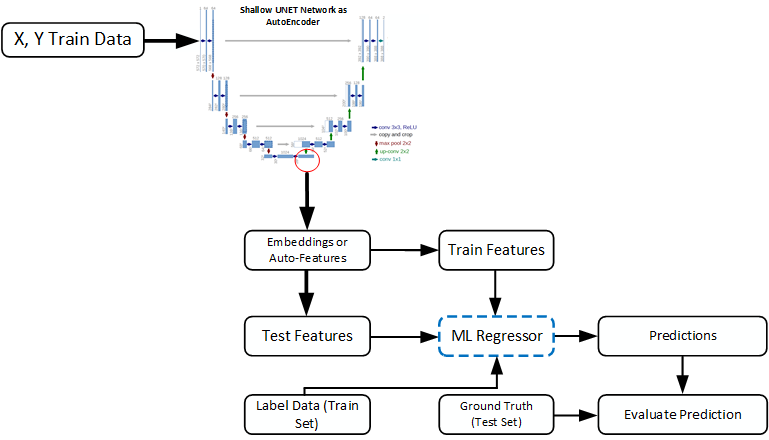

In [183]:
%cd /content/
PIL.Image.open('AE_Pipeline.png')

In [184]:
# General Parameters
feature_number = 2
signal_length = X_Train.shape[1]
# Extra Parameters
num_channel = 1
model_depth = 1
model_width = 128
kernel_size = 3

In [185]:
# Build model for PPG2BP - Shallow-Wide U-net as AutoEncoder
# D_S shoud be FALSE or '0' for the AutoEncoder Model
# D_S = 0 # Deep Supervision ON/OFF; A_E = 1 # AutoEncoder Model ON/OFF
AutoEnc_Unet = Unet(signal_length, model_depth, num_channel, model_width, kernel_size, 0, 1, feature_number,)
AutoEnc_Unet.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
AutoEnc_Unet.load_weights('/content/Model.h5')

In [187]:
callbacks = [EarlyStopping(monitor='val_loss', patience=20, mode='min'),
            ModelCheckpoint('/content/GDrive/MyDrive/Colab Notebooks/DG_Internship/Project Health+/Model.h5', verbose=1, monitor='val_loss', save_best_only= True, mode= 'min')]
AutoEnc_Unet.fit(X_Train, Y_Train, epochs= 100, batch_size= 128, verbose= 1, validation_split= 0.2, shuffle= True, callbacks= callbacks)

Epoch 1/100
18/18 [==============================] - 20s 59ms/step - loss: 0.7221 - mae: 0.5670 - val_loss: 0.3185 - val_mae: 0.4289

Epoch 00001: val_loss improved from inf to 0.31846, saving model to /content/GDrive/MyDrive/Colab Notebooks/DG_Internship/Project Health+/Model.h5
Epoch 2/100
18/18 [==============================] - 0s 15ms/step - loss: 0.1735 - mae: 0.3441 - val_loss: 0.3414 - val_mae: 0.4270

Epoch 00002: val_loss did not improve from 0.31846
Epoch 3/100
18/18 [==============================] - 0s 15ms/step - loss: 0.1455 - mae: 0.2942 - val_loss: 0.3240 - val_mae: 0.4340

Epoch 00003: val_loss did not improve from 0.31846
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 0.1312 - mae: 0.2693 - val_loss: 0.3194 - val_mae: 0.4371

Epoch 00004: val_loss did not improve from 0.31846
Epoch 5/100
18/18 [==============================] - 0s 16ms/step - loss: 0.1389 - mae: 0.2875 - val_loss: 0.2426 - val_mae: 0.4804

Epoch 00005: val_loss improved fro

In [188]:
UNETAE_Feature_Extractor = Model(inputs= AutoEnc_Unet.input, outputs= AutoEnc_Unet.get_layer('features').output)

In [189]:
Train_Features = UNETAE_Feature_Extractor.predict(X_Train)
Test_Features = UNETAE_Feature_Extractor.predict(X_Test)

In [190]:
Train_Features.shape

(2739, 2)

In [191]:
X_Train = Train_Features
X_Test = Test_Features

So it can be seen that the resulting transformed feature set is of much lower dimension than the original dataset (detail comparison is done in the report). Now, both will be trained to see if this compact feature set can really perform similar or even better than the whole, original dataset.

#### Machine Learning (ML)

##### Logistic Regression based Classifier

In [192]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error: %f" % MAE)
print("Score: %f" % Score)

Mean Absolute Error: 0.204380
Score: 0.854691


In [193]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[367,  64],
       [ 76, 178]])

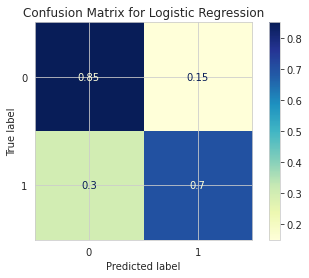

In [194]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Logistic Regression')
plt.show(matrix)

In [195]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7956204379562044
Precision = 0.7939929007677559
Recall = 0.7761477611122276
f1-Score = 0.794551167899376


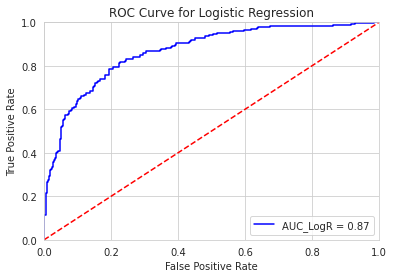

In [196]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_LogR, tpr_LogR, threshold = roc_curve(Y_Test, Probs)
roc_auc_LogR = auc(fpr_LogR, tpr_LogR)
#
plt.title('ROC Curve for Logistic Regression')
plt.plot(fpr_LogR, tpr_LogR, 'b', label = 'AUC_LogR = %0.2f' % roc_auc_LogR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [197]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,1
0,0
1,0
1,1
0,0
1,1
0,0
1,1
1,1
1,1
0,0
1,1
1,1
1,1
0,1
0,0
0,0
1,1
0,0
1,1
1,1
0,0
0,0
0,0
1,1
1,1
0,0
0,0
1,0
0,0
0,1
0,0
0,0
1,1
0,0
1,1
0,1
1,1
0,0
0,1
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
0,1
0,0
0,0
0,0
0,0
1,0
1,1
0,0
1,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
1,0
0,0
1,0
1,1
0,1
0,0
1,1
0,0
0,1
0,1
0,1
0,1
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,1
0,1
0,0
1,1
0,0
0,0
1,1
0,0
1,1
1,1
0,1
1,1
0,0
1,0
0,0
1,1
0,0
0,0
0,0
1,0
1,1
0,0
1,1
0,0
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
1,1
0,0
0,1
0,0
1,0
0,0
1,0
1,0
0,0
0,0
0,1
0,1
1,0
0,1
1,0
0,0
1,0
1,0
0,0
1,0
1,1
1,1
0,1
0,0
0,0
0,1
0,0
0,0
0,0
0,1
0,0
0,0
0,0
1,1
0,0
0,0
1,1
0,0
1,1
0,0
0,0
1,1
1,1
1,1
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,0
0,0
0,0
0,0
1,1
1,0
0,0
0,0
1,1
0,0
0,0
1,0
1,1
0,1
0,0
1,1
1,1
1,1
1,1
1,1
0,0
1,0
0,1
1,1
1,0
1,1
0,0
0,0
0,1
0,1
0,1
1,0
1,1
0,1
0,0
0,1
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,1
0,1
0,0
1,0
1,0
1,1
0,1
0,0
0,0
1,1
1,1
0,0


##### K-Nearest Neighbour (KNN) Classifier

In [198]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 7)
neigh = neigh.fit(X_Train, Y_Train)
Preds = neigh.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = neigh.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.207299
Score for Willingness: 0.871851


In [199]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[354,  77],
       [ 65, 189]])

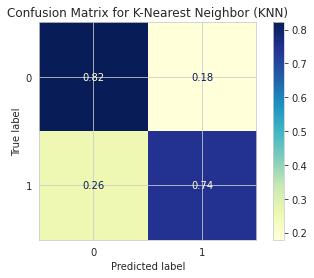

In [200]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(neigh, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for K-Nearest Neighbor (KNN)')
plt.show(matrix)

In [201]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7927007299270074
Precision = 0.7950541737686551
Recall = 0.7827200979227944
f1-Score = 0.7936293556164746


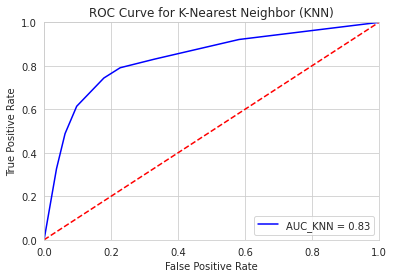

In [202]:
Probs = neigh.predict_proba(X_Test)[:,1]
fpr_KNN, tpr_KNN, threshold = roc_curve(Y_Test, Probs)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
#
plt.title('ROC Curve for K-Nearest Neighbor (KNN)')
plt.plot(fpr_KNN, tpr_KNN, 'b', label = 'AUC_KNN = %0.2f' % roc_auc_KNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [203]:
Probs.shape

(685,)

In [204]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,0
0,1
1,1
1,1
0,0
1,1
0,0
1,1
1,1
1,1
0,0
1,0
1,1
1,1
0,1
0,0
0,0
1,1
0,0
1,1
1,1
0,1
0,0
0,0
1,1
1,1
0,0
0,0
1,0
0,0
0,1
0,0
0,0
1,1
0,0
1,1
0,1
1,1
0,0
0,1
0,0
1,1
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
1,1
0,0
1,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
1,0
0,0
1,1
1,1
0,1
0,0
1,1
0,0
0,1
0,1
0,1
0,1
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,1
0,1
0,0
1,1
0,0
0,1
1,1
0,0
1,1
1,1
0,1
1,1
0,0
1,0
0,0
1,1
0,0
0,0
0,0
1,0
1,1
0,0
1,1
0,0
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
1,1
0,0
0,1
0,0
1,0
0,0
1,1
1,0
0,0
0,0
0,1
0,1
1,1
0,1
1,0
0,1
1,0
1,1
0,0
1,0
1,1
1,1
0,1
0,1
0,0
0,1
0,0
0,0
0,0
0,1
0,0
0,0
0,0
1,1
0,0
0,0
1,0
0,0
1,1
0,0
0,0
1,1
1,1
1,1
0,0
0,0
0,0
0,0
1,0
0,0
1,1
0,0
0,0
0,1
0,0
1,1
1,0
0,0
0,0
1,1
0,0
0,0
1,0
1,1
0,1
0,0
1,1
1,1
1,1
1,1
1,1
0,0
1,0
0,0
1,0
1,0
1,1
0,0
0,0
0,1
0,1
0,1
1,1
1,1
0,1
0,0
0,0
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
1,1
0,1
1,1
0,1
0,0
1,1
1,0
1,1
0,0
0,0
0,0
1,1
1,1
0,0


##### Support Vector Machine (SVM) Classifier(s) - SVCs

In [205]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability= True))
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.197080
Score for Willingness: 0.858708


In [206]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[365,  66],
       [ 69, 185]])

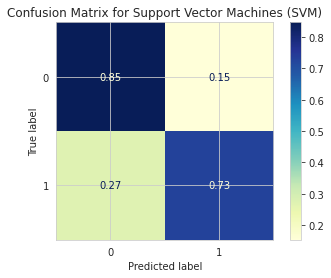

In [207]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Support Vector Machines (SVM)')
plt.show(matrix)

In [208]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.8029197080291971
Precision = 0.8024643998596083
Recall = 0.7876071030564336
f1-Score = 0.8026760787550844


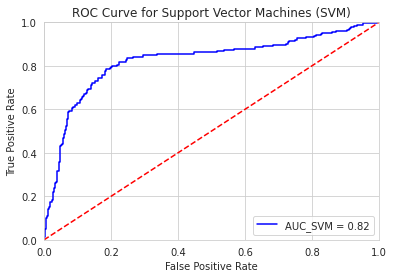

In [209]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_SVM, tpr_SVM, threshold = roc_curve(Y_Test, Probs)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
#
plt.title('ROC Curve for Support Vector Machines (SVM)')
plt.plot(fpr_SVM, tpr_SVM, 'b', label = 'AUC_SVM = %0.2f' % roc_auc_SVM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Stochastic Gradient Descent (SGD) Classifier

In [210]:
from sklearn.linear_model import SGDClassifier
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3, loss='log'))
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.210219
Score for Willingness: 0.838627


In [211]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[341,  90],
       [ 54, 200]])

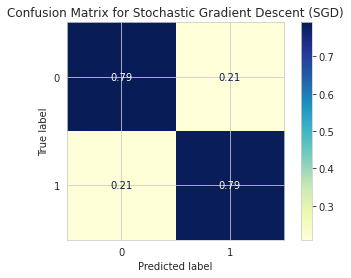

In [212]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Stochastic Gradient Descent (SGD)')
plt.show(matrix)

In [213]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7897810218978102
Precision = 0.7989064157748347
Recall = 0.7892924347333614
f1-Score = 0.7921557538022015


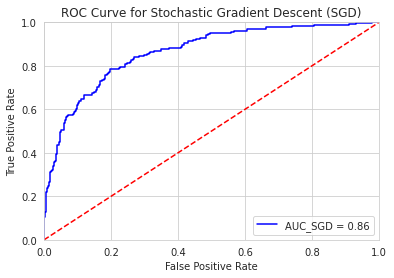

In [214]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_SGD, tpr_SGD, threshold = roc_curve(Y_Test, Probs)
roc_auc_SGD = auc(fpr_SGD, tpr_SGD)
#
plt.title('ROC Curve for Stochastic Gradient Descent (SGD)')
plt.plot(fpr_SGD, tpr_SGD, 'b', label = 'AUC_SGD = %0.2f' % roc_auc_SGD)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Decision Tree Classifier

In [215]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.252555
Score for Willingness: 1.000000


In [216]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[338,  93],
       [ 80, 174]])

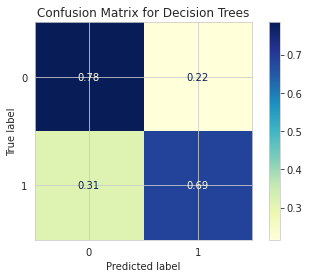

In [217]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Decision Trees')
plt.show(matrix)

In [218]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7474452554744525
Precision = 0.7504234330074868
Recall = 0.7346310539488828
f1-Score = 0.7486625546235667


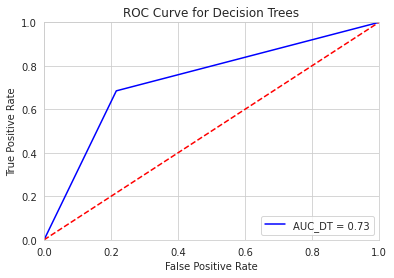

In [219]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_DT, tpr_DT, threshold = roc_curve(Y_Test, Probs)
roc_auc_DT = auc(fpr_DT, tpr_DT)
#
plt.title('ROC Curve for Decision Trees')
plt.plot(fpr_DT, tpr_DT, 'b', label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### GradBoost Classifier

In [220]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.197080
Score for Willingness: 0.884264


In [221]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[364,  67],
       [ 68, 186]])

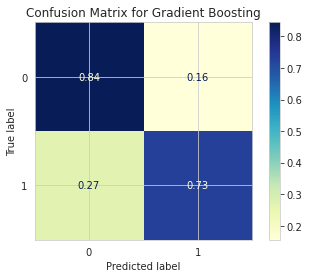

In [222]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show(matrix)

In [223]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.8029197080291971
Precision = 0.8027628982087883
Recall = 0.7884155141860167
f1-Score = 0.8028395320183299


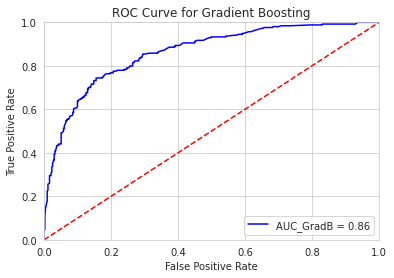

In [224]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_GradB, tpr_GradB, threshold = roc_curve(Y_Test, Probs)
roc_auc_GradB = auc(fpr_GradB, tpr_GradB)
#
plt.title('ROC Curve for Gradient Boosting')
plt.plot(fpr_GradB, tpr_GradB, 'b', label = 'AUC_GradB = %0.2f' % roc_auc_GradB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Random Forest Classifier

In [225]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.220438
Score for Willingness: 1.000000


In [226]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[355,  76],
       [ 75, 179]])

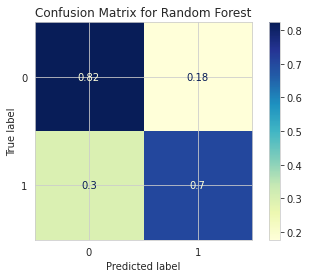

In [227]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Random Forest')
plt.show(matrix)

In [228]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7795620437956204
Precision = 0.7797425118409271
Recall = 0.7641951513601403
f1-Score = 0.7796505712772391


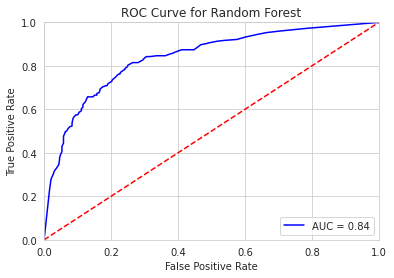

In [229]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_RF, tpr_RF, threshold = roc_curve(Y_Test, Probs)
roc_auc_RF = auc(fpr_RF, tpr_RF)
#
plt.title('ROC Curve for Random Forest')
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [230]:
for i in range(0,len(Y_Test.ravel())):
  print(f'{Y_Test[i]},{int(Preds[i])}')

1,1
0,0
0,0
0,1
1,0
1,1
0,0
1,1
0,0
1,1
1,1
1,1
0,0
1,1
1,1
1,1
0,0
0,0
0,0
1,1
0,1
1,1
1,1
0,1
0,0
0,0
1,1
1,0
0,0
0,0
1,0
0,0
0,1
0,0
0,0
1,1
0,0
1,1
0,0
1,1
0,0
0,1
0,0
1,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
1,1
0,0
1,0
0,0
1,1
0,0
0,0
1,0
0,0
0,0
0,0
1,0
0,1
1,1
1,1
0,1
0,0
1,1
0,0
0,1
0,1
0,1
0,1
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
1,1
0,0
1,0
0,0
1,1
0,1
0,0
1,1
0,0
0,1
1,1
0,0
1,1
1,1
0,1
1,1
0,0
1,0
0,0
1,1
0,0
0,0
0,0
1,0
1,1
0,0
1,1
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
1,0
0,0
0,0
0,0
0,1
1,1
0,0
0,1
0,0
1,0
0,0
1,1
1,0
0,0
0,0
0,1
0,1
1,1
0,1
1,0
0,0
1,0
1,1
0,0
1,0
1,1
1,1
0,1
0,1
0,0
0,1
0,0
0,0
0,0
0,1
0,0
0,0
0,0
1,1
0,0
0,0
1,0
0,0
1,1
0,0
0,0
1,1
1,1
1,1
0,0
0,0
0,0
0,0
1,0
0,0
1,0
0,0
0,0
0,1
0,0
1,0
1,0
0,0
0,0
1,1
0,0
0,0
1,0
1,0
0,1
0,0
1,1
1,1
1,1
1,1
1,1
0,0
1,0
0,1
1,0
1,0
1,1
0,0
0,0
0,1
0,1
0,0
1,1
1,1
0,1
0,0
0,1
1,1
0,1
0,0
0,0
0,0
1,0
0,0
1,1
0,0
1,1
0,0
0,0
0,1
0,0
0,0
0,0
1,1
0,1
1,1
0,1
0,0
1,1
1,0
1,1
0,0
0,1
0,0
1,1
1,1
0,0


##### Extra-Trees Classifier

In [231]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.227737
Score for Willingness: 1.000000


In [232]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[359,  72],
       [ 84, 170]])

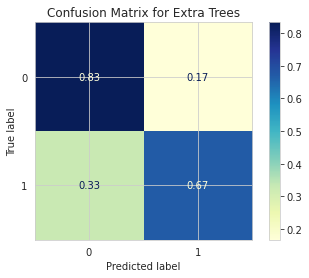

In [233]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Extra Trees')
plt.show(matrix)

In [234]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7722627737226277
Precision = 0.7703724775182128
Recall = 0.7511189871567678
f1-Score = 0.7710713013735904


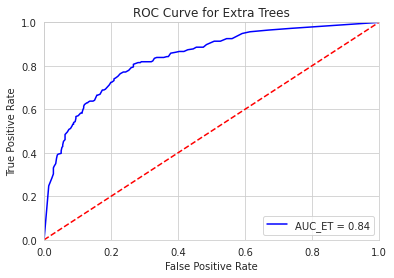

In [235]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_ET, tpr_ET, threshold = roc_curve(Y_Test, Probs)
roc_auc_ET = auc(fpr_ET, tpr_ET)
#
plt.title('ROC Curve for Extra Trees')
plt.plot(fpr_ET, tpr_ET, 'b', label = 'AUC_ET = %0.2f' % roc_auc_ET)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### AdaBoost Classifier

In [236]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.208759
Score for Willingness: 0.865279


In [237]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[354,  77],
       [ 66, 188]])

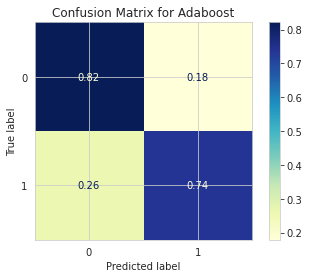

In [238]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Adaboost')
plt.show(matrix)

In [239]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7912408759124088
Precision = 0.7933834379365298
Recall = 0.7807515939857865
f1-Score = 0.7921039524710624


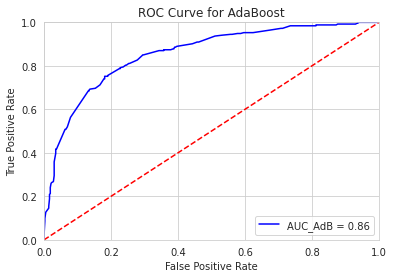

In [240]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_AdB, tpr_AdB, threshold = roc_curve(Y_Test, Probs)
roc_auc_AdB = auc(fpr_AdB, tpr_AdB)
#
plt.title('ROC Curve for AdaBoost')
plt.plot(fpr_AdB, tpr_AdB, 'b', label = 'AUC_AdB = %0.2f' % roc_auc_AdB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### XgBoost Classifier

In [241]:
import xgboost as xgb
clf = xgb.XGBClassifier(objective='reg:tweedie')
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.198540
Score for Willingness: 0.873311


In [242]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[365,  66],
       [ 70, 184]])

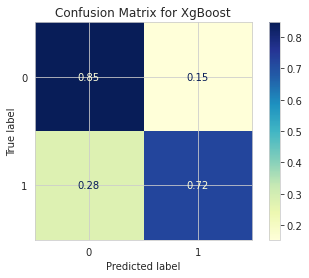

In [243]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for XgBoost')
plt.show(matrix)

In [244]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.8014598540145985
Precision = 0.8008579243225102
Recall = 0.7856385991194257
f1-Score = 0.8011305185695367


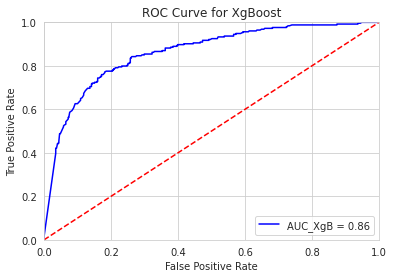

In [245]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_XgB, tpr_XgB, threshold = roc_curve(Y_Test, Probs)
roc_auc_XgB = auc(fpr_XgB, tpr_XgB)
#
plt.title('ROC Curve for XgBoost')
plt.plot(fpr_XgB, tpr_XgB, 'b', label = 'AUC_XgB = %0.2f' % roc_auc_XgB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Multi-Layer Perceptron (MLP) Classifier

In [246]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=1000)
clf = clf.fit(X_Train, Y_Train)
Preds = clf.predict(X_Test)
MAE = mean_absolute_error(Y_Test, Preds)
Score = clf.score(X_Train, Y_Train)
print("Mean Absolute Error for Classification: %f" % MAE)
print("Score for Willingness: %f" % Score)

Mean Absolute Error for Classification: 0.211679
Score for Willingness: 0.851041


In [247]:
# Round Predictions
Predictions = np.zeros(len(Preds))
for i in range(0,len(Preds)):
  Predictions[i] = round(Preds[i])

# Generate Confusion Matrix
confusion_matrix(Y_Test, Predictions)

array([[368,  63],
       [ 82, 172]])

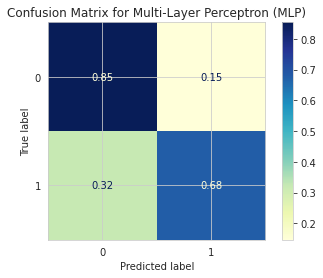

In [248]:
# Plot Normalized Confusion Matrix
matrix = plot_confusion_matrix(clf, X_Test, Y_Test, cmap= 'YlGnBu', normalize= 'true')
plt.title('Confusion Matrix for Multi-Layer Perceptron (MLP)')
plt.show(matrix)

In [249]:
# Evaluating Parameters
Accuracy = accuracy_score(Y_Test, Predictions)
print(f'Accuracy = {Accuracy}')
Precision = precision_score(Y_Test, Predictions, average= 'weighted')
print(f'Precision = {Precision}')
Recall = recall_score(Y_Test, Predictions, average= 'macro')
print(f'Recall = {Recall}')
f1_Score = f1_score(Y_Test, Predictions, average= 'weighted')
print(f'f1-Score = {f1_Score}')

Accuracy = 0.7883211678832117
Precision = 0.7859395696364171
Recall = 0.7654968302976048
f1-Score = 0.7864913733088111


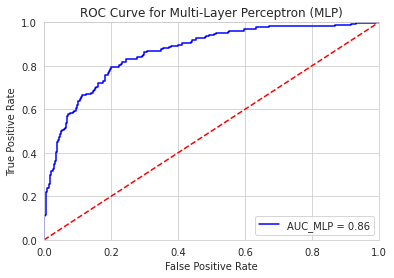

In [250]:
Probs= clf.predict_proba(X_Test)[:,1]
fpr_MLP, tpr_MLP, threshold = roc_curve(Y_Test, Probs)
roc_auc_MLP = auc(fpr_MLP, tpr_MLP)
#
plt.title('ROC Curve for Multi-Layer Perceptron (MLP)')
plt.plot(fpr_MLP, tpr_MLP, 'b', label = 'AUC_MLP = %0.2f' % roc_auc_MLP)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Combined ROC Plot(s)

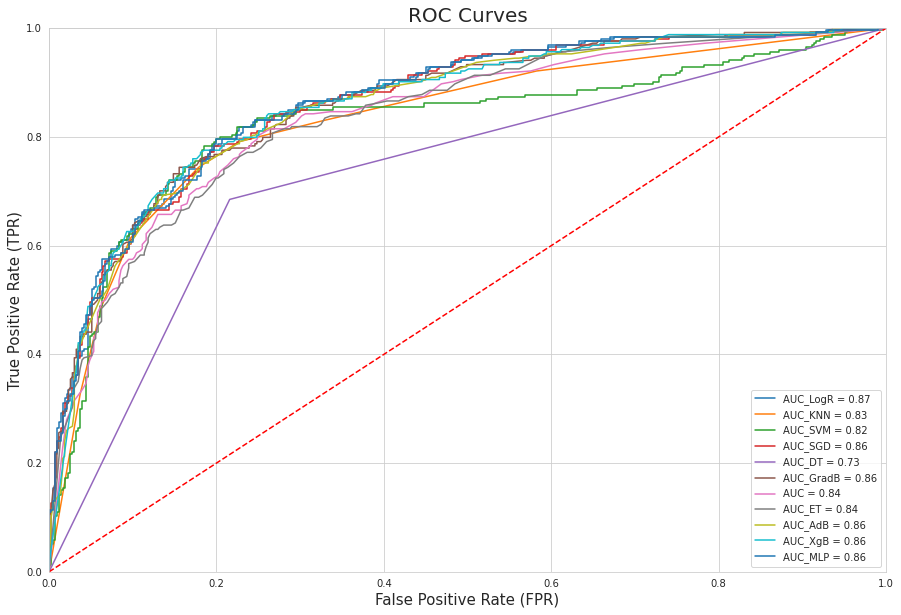

In [251]:
plt.figure(figsize = (15,10))
plt.title('ROC Curves', fontsize = 20)
plt.plot(fpr_LogR, tpr_LogR, label = 'AUC_LogR = %0.2f' % roc_auc_LogR)
plt.plot(fpr_KNN, tpr_KNN, label = 'AUC_KNN = %0.2f' % roc_auc_KNN)
plt.plot(fpr_SVM, tpr_SVM, label = 'AUC_SVM = %0.2f' % roc_auc_SVM)
plt.plot(fpr_SGD, tpr_SGD, label = 'AUC_SGD = %0.2f' % roc_auc_SGD)
plt.plot(fpr_DT, tpr_DT, label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.plot(fpr_GradB, tpr_GradB, label = 'AUC_GradB = %0.2f' % roc_auc_GradB)
plt.plot(fpr_RF, tpr_RF, label = 'AUC = %0.2f' % roc_auc_RF)
plt.plot(fpr_ET, tpr_ET, label = 'AUC_ET = %0.2f' % roc_auc_ET)
plt.plot(fpr_AdB, tpr_AdB, label = 'AUC_AdB = %0.2f' % roc_auc_AdB)
plt.plot(fpr_XgB, tpr_XgB, label = 'AUC_XgB = %0.2f' % roc_auc_XgB)
plt.plot(fpr_MLP, tpr_MLP, label = 'AUC_MLP = %0.2f' % roc_auc_MLP)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)', fontsize = 15)
plt.xlabel('False Positive Rate (FPR)', fontsize = 15)
plt.show()

##### KERAS Built Custom ANN

In [253]:
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import seed

model = Sequential()
model.add(Dense(24, input_dim=2, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_Train, Y_Train, epochs=150, batch_size=10,shuffle=True)
Y_pred = model.predict_classes(X_Test, verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 24)                72        
_________________________________________________________________
dense_5 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 13        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
274/274 [==============================] - 1s 2ms/step - loss: 0.4744 - accuracy: 0.7750
Epoch 2/150
274/274 [==============================] - 1s 2ms/step - loss: 0.4217 - accuracy: 0.8119
Epoch 3/150
274/274 [==============================] - 1s 2ms/step - loss: 0.3845 - accuracy: 0.8283
Epoch 4/150
274/274 [==============================] - 1s 2ms/step - loss: 0.3880 -

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [254]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_pred))

_, accuracy = model.evaluate(X_Train, Y_Train)
print('Accuracy: %.2f' % (accuracy*100))

_, test_acc = model.evaluate(X_Test, Y_Test, verbose=0)
print('Accuracy: %.2f' % (test_acc*100))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       431
           1       0.71      0.76      0.73       254

    accuracy                           0.80       685
   macro avg       0.78      0.79      0.79       685
weighted avg       0.80      0.80      0.80       685

86/86 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.8540
Accuracy: 85.40
Accuracy: 79.71


## Evaluation of Results